In [2]:
label=['random', 'shortest']
x = ['x = [1,2, ..., 10]', 'x = [1, 1.25, 1.5]']
chord = [25, 18, 10.25, 10]
nn = [13, 23, 43.75, 43.5]
K_ring = [22, 13, 8,  6.25, 6.0, 13.0]

# Data
labels = ['w in [1,2, ..., 10]', 'w in [1, 1.25, 1.5]', 'w in N(5, 1)']
# chord_random = [25, 10.25]
# chord_shortest = [18, 10]

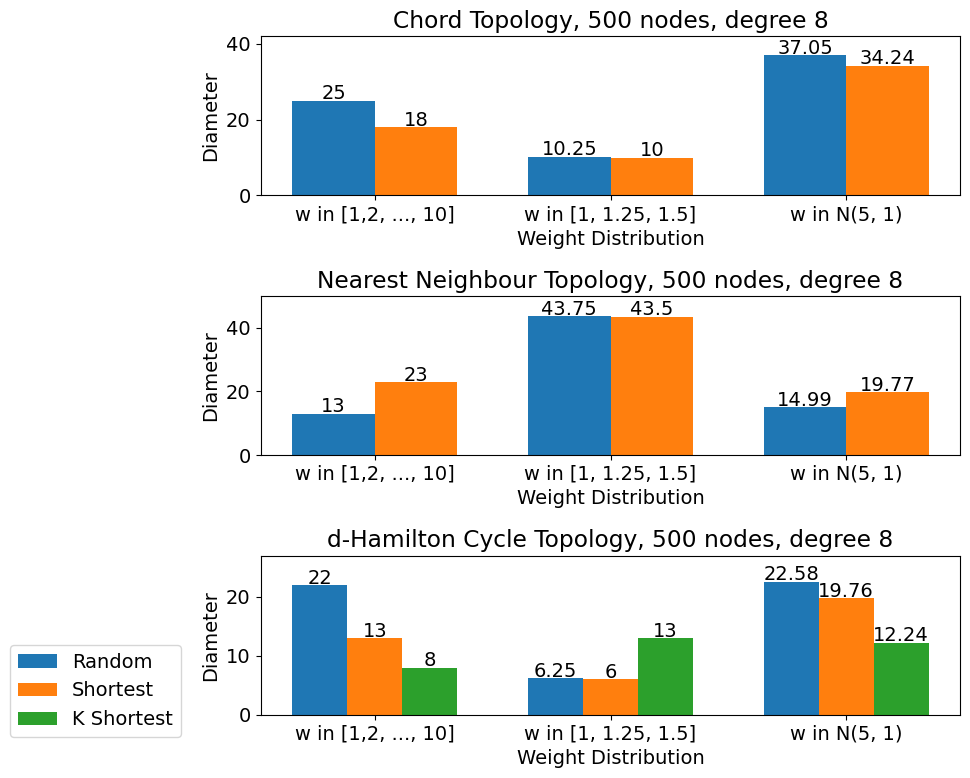

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
font = {
        'size'   : 14}
matplotlib.rc('font', **font)
chord_random = [25, 10.25,  37.05]
chord_shortest = [18, 10, 34.24]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(nrows=3, figsize=(10, 8))
rects1 = ax[0].bar(x - width/2, chord_random, width, label='Random')
rects2 = ax[0].bar(x + width/2, chord_shortest, width, label='Shortest')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[0].set_ylabel('Diameter')
ax[0].set_ylim([0, 42])
ax[1].set_ylim([0, 50])
ax[2].set_ylim([0, 27])
ax[0].set_xlabel('Weight Distribution')
ax[0].set_title('Chord Topology, 500 nodes, degree 8')
ax[0].set_xticks(x)
ax[0].set_xticklabels(labels)
# ax[0].legend(loc='upper right', bbox_to_anchor=(-0.05, 0.5))

ax[0].bar_label(rects1, padding=-2)
ax[0].bar_label(rects2, padding=-2)

# fig.tight_layout()

# plt.savefig('chord.pdf')
# import matplotlib.pyplot as plt
# import numpy as np

chord_random = [13, 43.75, 14.99]
chord_shortest = [23, 43.5, 19.77]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

# fig, ax = plt.subplots(figsize=(10, 3))
rects1 = ax[1].bar(x - width/2, chord_random, width, label='Random')
rects2 = ax[1].bar(x + width/2, chord_shortest, width, label='Shortest')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[1].set_ylabel('Diameter')
ax[1].set_xlabel('Weight Distribution')
ax[1].set_title('Nearest Neighbour Topology, 500 nodes, degree 8')
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels)
# ax[1].legend(loc='upper right', bbox_to_anchor=(-0.05, 0.5))

ax[1].bar_label(rects1, padding=-2)
ax[1].bar_label(rects2, padding=-2)

# fig.tight_layout()

# plt.savefig('nearest_neighbour.pdf')
K_ring = [22, 13, 8,  6.25, 6.0, 13.0]

# import matplotlib.pyplot as plt
# import numpy as np

chord_random = [22, 6.25, 22.58]
chord_shortest = [13, 6.0, 19.76]
chord_k_shortest = [8, 13, 12.24]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

# fig, ax = plt.subplots(figsize=(10, 3))
rects1 = ax[2].bar(x - width/3 * 2, chord_random, width / 3 * 2, label='Random')
rects2 = ax[2].bar(x, chord_shortest, width/ 3 * 2, label='Shortest')
rects3 = ax[2].bar(x + width/3 * 2, chord_k_shortest, width/ 3 * 2, label='K Shortest')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[2].set_ylabel('Diameter')
ax[2].set_xlabel('Weight Distribution')
ax[2].set_title('d-Hamilton Cycle Topology, 500 nodes, degree 8')
ax[2].set_xticks(x)
ax[2].set_xticklabels(labels)
ax[2].legend(loc='upper right', bbox_to_anchor=(-0.1, 0.5))

ax[2].bar_label(rects1, padding=-2)
ax[2].bar_label(rects2, padding=-2)
ax[2].bar_label(rects3, padding=-2)

fig.tight_layout()

# plt.savefig('k_ring.pdf')
plt.savefig('combine.pdf')

In [1]:
import torch as th
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
data_perigee = []

with open(f"N=5000_cluster_guassian.pkl", "rb") as f:
    data = pkl.load(f)

with open(f"N=1000_bitnode.pkl", "rb") as f:
    data_bitnode = pkl.load(f)
    for key in data_bitnode.keys():
        data[key].append(data_bitnode[key][0])

for i in range(1, 6, 1):
    with open(f"N={i}000_0_Gaussian_perigee.pkl", "rb") as f:
        data_perigee.append(th.as_tensor(pkl.load(f), dtype=th.float32).mean().item())
with open(f"N=1000_0_bitnode_perigee.pkl", "rb") as f:
    data_bitnode_perigee = pkl.load(f)
    data_perigee.append(th.as_tensor(data_bitnode_perigee, dtype=th.float32).mean().item())
print(data)
print(data_perigee)

data['Chord'] = data['chord_random_ring']
data['NN'] = data['nearest_neighbour_random_ring']
data['RAPID'] = data['K_ring_random_ring']
data['Perigee'] = data_perigee
data['Ours'] = data['K_shortest_ring']

{'chord_shortest_ring': [599, 616, 649, 672, 696, np.float64(670.0)], 'chord_random_ring': [609, 629, 652, 707, 723, np.float64(830.0)], 'nearest_neighbour_shortest_ring': [475, 662, 632, 640, 656, np.float64(630.0)], 'nearest_neighbour_random_ring': [512, 513, 497, 538, 504, np.float64(280.0)], 'K_ring_shortest_ring': [296, 300, 290, 176, 176, np.float64(330.0)], 'K_ring_random_ring': [474, 484, 488, 488, 491, np.float64(690.0)], 'K_shortest_ring': [148, 272, 147, 151, 146, np.float64(250.0)]}
[358.75, 459.625, 520.25, 560.0, 544.5, 758.75]


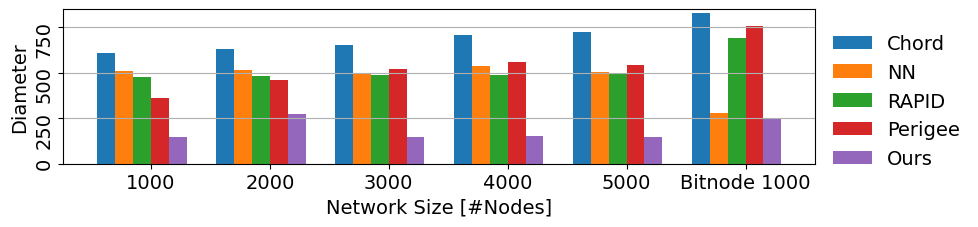

In [40]:
import matplotlib
font = {
        'size'   : 14}
matplotlib.rc('font', **font)
labels = ['Chord', 'NN', 'RAPID', 'Perigee', 'Ours']
hatches = ["x", "/", ".", "\\",'']
tab10 = sns.color_palette("tab10", n_colors=5)
face_colors = tab10
x = np.arange(6)
x_tickslabel = ['1000', '2000', '3000', '4000', '5000', 'Bitnode 1000']
width = 0.15

fig, ax = plt.subplots(figsize=(10, 2.5))
for i, label in enumerate(labels):
    ax.bar(x + i*width, data[label], width, label=label, color=face_colors[i])
ax.set_ylabel('Diameter')
ax.set_yticks([0, 250, 500, 750, 1000])
# ax.set_yticklabels(['0', '2.5', '5', '7.5', '10'])
ax.set_yticklabels(['0', '250', '500', '750', '1000'], rotation=90)
# ax.set_title('Diameter of different algorithms')
ax.set_xticks(x + 2.5*width)
ax.set_xticklabels(x_tickslabel)
ax.set_xlabel('Network Size [#Nodes]')
ax.legend(loc='upper left', bbox_to_anchor=(1.0, .95), frameon=False)
ax.grid(axis='y')
ax.set_ylim([0, 850])
plt.tight_layout()
# plt.show()
plt.savefig("diameter.png", bbox_inches='tight',)
# plt.savefig("diameter.pdf", bbox_inches='tight')


In [21]:
data = {'chord_shortest_ring': [28.262380685871165, 33.83343845055416, 36.80272650385673, 35.32956629410444, 39.234748643841066, 34.95843391512173, 37.768245782987975, 40.2644375981636, 41.83391892948736, 36.464708856234495, 36.40087270423675], 'chord_random_ring': [29.392086408375583, 36.85077953277981, 39.30679204738034, 38.675835907620296, 42.49867342665982, 39.35142448562006, 41.37720228959562, 43.78784865474357, 45.038292998107735, 40.63821354732185, 41.167721527822465], 'nearest_neighbour_shortest_ring': [16.475104958513363, 20.055399163488932, 21.569938547144304, 21.877343468299095, 22.172967575369782, 22.683247198226805, 22.891097755953446, 23.052881429739465, 23.284528743664964, 23.66943824501755, 23.668511416402552], 'nearest_neighbour_random_ring': [12.548711254113723, 13.673151686267726, 15.224271409410154, 13.739807202323501, 14.729963855900355, 13.696791233980388, 14.055464853368886, 13.770506692228906, 13.628485022561268, 13.739640201855039, 13.571078603970493], 'K_ring_shortest_ring': [16.66657984025268, 19.55596605215894, 20.75232664131655, 21.686732036266264, 21.881465408246918, 23.00067229359763, 22.77896904485963, 23.33835285627402, 22.775558604069502, 23.387646917457527, 23.325480813428705], 'K_ring_random_ring': [18.7591501667967, 22.38931339418201, 24.207707077368767, 25.48117013289871, 26.24786005840055, 26.589223964098867, 27.714279083291494, 27.672705342654222, 27.880391708844083, 28.39976282942855, 28.93032315965007], 'K_ring_greedy': [12.099343640569106, 12.355738902689936, 12.452506681863984, 12.045200360810943, 12.132189258604644, 11.848618530319994, 11.92745853758452, 11.811056066662259, 11.676745168820762, 11.424633155679079, 11.443119528845891], 'K_ring_epsilon_greedy': [12.19614203055999, 13.002758662720478, 12.600079935578563, 12.572511175666365, 12.450823644195733, 12.074428267414774, 12.154567661596204, 12.069159188768115, 12.045097935781898, 12.017719574865042, 12.37162453130453]}
data['Chord'] = data['chord_random_ring']
data['Chord_Hamilton'] = data['chord_shortest_ring']
data['NN'] = data['nearest_neighbour_shortest_ring']
data['NN_Hamilton'] = data['nearest_neighbour_random_ring']
data['Perigee'] = data['nearest_neighbour_shortest_ring']
data['Perigee_Hamilton'] = data['nearest_neighbour_random_ring']
data['RAPID'] = data['K_ring_random_ring']
# data['Perigee'] = data_perigee
data['Ours'] = data['K_ring_shortest_ring']
data['Ours_greedy'] = data['K_ring_greedy']

In [22]:
data_gaussian = {'chord_shortest_ring': [14.980182390334999, 24.490774378587716, 27.59540647542554, 26.640316823186946, 31.089368158730363, 31.390815236949678, 30.289412152416542, 30.003840131386486, 33.79476948021938, 34.287889220710255, 34.1998689889897, 30.433477953405152, 32.395645545929355, 31.484744784554678, 32.599518161934206, 32.96930806653888, 35.81275508022222, 35.40071468244394, 37.52051299397345, 35.95550479345518, 36.59147503353368], 'chord_random_ring': [14.218662992582889, 25.379713649573592, 29.745948882996043, 28.278755948099242, 32.95795948815675, 33.42920433391514, 31.352265071492635, 32.934293807624165, 36.743206097122425, 36.40219388577873, 37.218499382039205, 32.656621838123975, 34.560452923300055, 33.7790368599341, 35.6737578915266, 36.13223054024883, 38.023293714184796, 38.423581763725274, 39.85237179448408, 39.684106883264846, 39.41488188993464], 'nearest_neighbour_shortest_ring': [17.88049460728012, 18.76952519964239, 18.027897991224634, 18.806729551668717, 19.40492863276795, 18.93442696197502, 18.491937781873425, 19.650786520701388, 19.446617713054287, 19.826460768088303, 19.763783149320602, 19.088444340845328, 19.600558069706704, 19.528561681508883, 19.54313575306908, 19.908090658042397, 19.620361959499593, 20.299597705319837, 20.01771812748395, 20.41534736377834, 20.274003632107267], 'nearest_neighbour_random_ring': [17.49002160884475, 14.769193517574536, 14.468166649311033, 14.224173615950551, 13.813388706517884, 13.91310744797326, 13.517007319095603, 15.001432250091444, 13.7115028345006, 14.447891088512925, 13.895419699343591, 13.218001369309714, 13.102927605027395, 13.696815250145779, 13.51157153378191, 13.351435902677602, 13.344238912561858, 13.944366889263893, 13.396235511121617, 12.832678793754045, 13.656864514258862], 'K_ring_shortest_ring': [14.851779298155904, 17.700439118439824, 19.535300642410373, 18.306009268294233, 19.042281317247994, 19.54407149317513, 18.7967271875113, 18.90441293699241, 18.819332117644844, 19.657597076363537, 19.772498565346535, 19.12849095103637, 19.562671813775005, 19.625408071766785, 19.783931377369743, 19.797513095029757, 19.83827444420033, 19.725957824080663, 19.920130471571674, 20.322647085882984, 20.196832764261035], 'K_ring_random_ring': [17.113593510831976, 19.873203605040356, 20.642301801539666, 20.129638579576923, 21.625570211176207, 21.79853015407059, 21.725980973293957, 22.111557040993745, 22.28038568446951, 22.561385958552258, 22.565935280910548, 21.718236187099834, 21.716943987617412, 22.059551108585385, 22.33019043326987, 22.100976725567392, 23.226240656251278, 22.57236046751093, 22.765136536752234, 23.052739404023207, 23.47766261991042], 'K_ring_greedy': [15.831094794240856, 14.521709109520394, 13.624370910768107, 13.337017932582883, 13.646373645560354, 13.92706231685813, 12.765407559532903, 12.730619345235024, 12.481614441391034, 12.477169878332, 12.256805485315986, 12.44126838097053, 12.139013262925555, 11.983824281136524, 11.916616340120443, 11.85831188779952, 12.031051374550444, 11.792208497490089, 12.037648316931886, 11.886425011113912, 11.703550887295034], 'K_ring_epsilon_greedy': [17.123253573809627, 15.254030106765473, 13.971613991227054, 13.34966703408717, 13.422843841170465, 14.36365649461522, 12.625911980615124, 12.68562004791881, 12.954810059489962, 13.109287551805005, 12.569202834667262, 12.071900073581968, 12.23695625444746, 12.405926973765336, 12.505249522451358, 12.020299740517528, 12.226667986109181, 12.469490448381599, 12.259903194653043, 12.178646242848938, 12.081669836878902]}
data_gaussian = {'chord_shortest_ring': [13.759211202228698, 22.00396115115405, 20.246000752296972, 20.772801594697953, 20.693087508887526, 21.251664405893216, 21.109289589629313, 20.698080501280348, 21.44022495372116, 21.19905229162746, 21.539632458638934, 20.861016031093904, 20.71262589876688, 21.074146894075607, 20.879331149367534, 21.25863452049762, 21.49260347968285, 21.27012127707003, 21.863354500179458, 21.175168177197698, 21.588249821070708], 'chord_random_ring': [14.583137432743909, 25.355627122935097, 28.498001845759294, 27.939900497171386, 32.29794140591022, 34.433070955225936, 31.773906303777185, 33.17780235203004, 34.90716494641948, 36.42737089888312, 35.757246407487216, 32.956462708046296, 35.18082417748765, 34.21794767680579, 35.644766749938, 35.91693287706117, 39.42315563757528, 38.13207700602206, 39.12154960314254, 39.70209454448029, 39.76303634570848], 'nearest_neighbour_shortest_ring': [18.24204239219896, 18.597691841818772, 19.275445421233947, 18.928442068635277, 18.539094497290456, 19.355092210233074, 18.78189330310665, 18.8345015259831, 19.438506534269255, 19.42822851823821, 19.677865614259872, 19.14604611271393, 18.84365023031488, 19.014947513779845, 19.640420658343487, 19.606529362386734, 19.541506932315098, 20.068855607296953, 19.7724495023186, 19.871709811255432, 20.324852984748766], 'nearest_neighbour_random_ring': [16.51421737360237, 18.989515001373768, 20.318031608503677, 20.544030750451814, 21.46564697774167, 21.65955683738213, 21.086839224371353, 21.24077991411805, 21.974155186804953, 22.09308447155591, 22.274501300776027, 21.512264561348516, 21.990817610508643, 21.795172410107085, 22.404617222015055, 22.112438298227314, 22.428253285094556, 22.61967453332911, 22.666834374266127, 22.920726879514305, 23.129430498030914], 'K_ring_shortest_ring': [14.851779298155904, 18.002947137211585, 19.377767576768953, 18.426454658970002, 19.042281317247994, 19.447672919556727, 19.13412337557845, 19.653833941354414, 18.883280203020323, 19.618808614953778, 19.55845521709656, 19.09178602792314, 19.29864526495022, 19.69967138690151, 19.211357743395784, 19.871970550086033, 19.74103012371331, 20.29784700087472, 19.6443494037121, 19.965816775890243, 19.99269504566078], 'K_ring_random_ring': [17.113593510831976, 19.873203605040356, 20.642301801539666, 20.129638579576923, 21.625570211176207, 21.79853015407059, 21.725980973293957, 22.111557040993745, 22.28038568446951, 22.561385958552258, 22.565935280910548, 21.718236187099834, 21.716943987617412, 22.059551108585385, 22.33019043326987, 22.100976725567392, 23.226240656251278, 22.57236046751093, 22.765136536752234, 23.052739404023207, 23.47766261991042], 'K_ring_greedy': [17.823687694063217, 15.184251963611663, 13.4654790123294, 13.282930833153994, 13.199584114828783, 13.234469542466435, 12.40893478576837, 12.19623185327167, 12.499265012970593, 12.546288007417868, 12.305132316990884, 12.203441406790754, 11.827583595177412, 12.18837422892465, 12.06221317508527, 11.720593685901894, 12.082419003626764, 12.300895275735643, 11.975568804492998, 12.009785328854628, 11.695011268039917], 'K_ring_epsilon_greedy': [20.501766144518353, 16.234006170160622, 14.334077584687869, 13.916592618451912, 13.826249491653236, 14.540214394794798, 12.814626518543772, 13.057296228238348, 13.375761274242837, 12.679885303119065, 12.853634234904003, 12.190694448206447, 12.445437572859628, 12.260392523766429, 12.250224062401323, 12.33962215192195, 12.167801823239552, 12.075871183970152, 12.300385990017698, 12.37765246176956, 11.964774128920414]}
data_gaussian =  {'chord_shortest_ring': [17.12723868503146, 19.54543925657058, 20.16961926046309, 20.05181892984732, 20.91552273455598, 21.655472803623994, 20.299425808629813, 20.627865753479032, 21.343150835452647, 21.428854809005966, 21.41183885496958, 20.468041008437982, 20.647280243698845, 21.164400662957135, 21.03587229569155, 21.05463960006019, 21.291045219507744, 21.17963565140891, 21.54575674460625, 21.249417482355476, 22.149397022231486], 'chord_random_ring': [14.218662992582889, 25.379713649573592, 29.745948882996043, 28.278755948099242, 32.95795948815675, 33.42920433391514, 31.352265071492635, 32.934293807624165, 36.743206097122425, 36.40219388577873, 37.218499382039205, 32.656621838123975, 34.560452923300055, 33.7790368599341, 35.6737578915266, 36.13223054024883, 38.023293714184796, 38.423581763725274, 39.85237179448408, 39.684106883264846, 39.41488188993464], 'nearest_neighbour_shortest_ring': [24.14603524334469, 16.56395012701507, 15.841817413996338, 13.925203297962247, 14.500785101448795, 14.208939451843337, 15.509266149677622, 14.176764401975976, 13.445298506280281, 13.576423605260501, 13.925286192696369, 14.308347617018308, 13.15426490321378, 13.101495455869696, 12.537070385585741, 12.835739572709583, 13.078503554563312, 13.273202575406781, 12.80946107488665, 12.873812197902499, 13.345073010592763], 'nearest_neighbour_random_ring': [17.49002160884475, 14.769193517574536, 14.468166649311033, 14.224173615950551, 13.813388706517884, 13.91310744797326, 13.517007319095603, 15.001432250091444, 13.7115028345006, 14.447891088512925, 13.895419699343591, 13.218001369309714, 13.102927605027395, 13.696815250145779, 13.51157153378191, 13.351435902677602, 13.344238912561858, 13.944366889263893, 13.396235511121617, 12.832678793754045, 13.656864514258862], 'K_ring_shortest_ring': [14.851779298155904, 18.002947137211585, 19.377767576768953, 18.426454658970002, 19.042281317247994, 19.447672919556727, 19.13412337557845, 19.653833941354414, 18.883280203020323, 19.618808614953778, 19.55845521709656, 19.09178602792314, 19.29864526495022, 19.69967138690151, 19.211357743395784, 19.871970550086033, 19.74103012371331, 20.29784700087472, 19.6443494037121, 19.965816775890243, 19.99269504566078], 'K_ring_random_ring': [17.113593510831976, 19.873203605040356, 20.642301801539666, 20.129638579576923, 21.625570211176207, 21.79853015407059, 21.725980973293957, 22.111557040993745, 22.28038568446951, 22.561385958552258, 22.565935280910548, 21.718236187099834, 21.716943987617412, 22.059551108585385, 22.33019043326987, 22.100976725567392, 23.226240656251278, 22.57236046751093, 22.765136536752234, 23.052739404023207, 23.47766261991042], 'K_ring_greedy': [17.823687694063217, 15.184251963611663, 13.4654790123294, 13.282930833153994, 13.199584114828783, 13.234469542466435, 12.40893478576837, 12.19623185327167, 12.499265012970593, 12.546288007417868, 12.305132316990884, 12.203441406790754, 11.827583595177412, 12.18837422892465, 12.06221317508527, 11.720593685901894, 12.082419003626764, 12.300895275735643, 11.975568804492998, 12.009785328854628, 11.695011268039917], 'K_ring_epsilon_greedy': [20.501766144518353, 16.234006170160622, 14.334077584687869, 13.916592618451912, 13.826249491653236, 14.540214394794798, 12.814626518543772, 13.057296228238348, 13.375761274242837, 12.679885303119065, 12.853634234904003, 12.190694448206447, 12.445437572859628, 12.260392523766429, 12.250224062401323, 12.33962215192195, 12.167801823239552, 12.075871183970152, 12.300385990017698, 12.37765246176956, 11.964774128920414]}
data_gaussian['Chord'] = data_gaussian['chord_random_ring']
data_gaussian['Chord_Hamilton'] = data_gaussian['chord_shortest_ring']
data_gaussian['NN'] = data_gaussian['nearest_neighbour_shortest_ring']
data_gaussian['NN_Hamilton'] = data_gaussian['nearest_neighbour_random_ring']
data_gaussian['Perigee'] = data_gaussian['nearest_neighbour_shortest_ring']
data_gaussian['Perigee_Hamilton'] = data_gaussian['nearest_neighbour_random_ring']
data_gaussian['RAPID'] = data_gaussian['K_ring_random_ring']
# data['Perigee'] = data_perigee
data_gaussian['Ours'] = data_gaussian['K_ring_shortest_ring']
data_gaussian['Ours_greedy'] = data_gaussian['K_ring_greedy']

In [23]:
data_uniform =  {'chord_shortest_ring': [13, 17, 19, 18, 18, 19, 17, 17, 17, 19, 21, 18, 16, 17, 18, 19, 19, 18, 21, 20, 20], 'chord_random_ring': [14, 22, 23, 21, 23, 25, 24, 23, 24, 25, 26, 22, 23, 22, 23, 23, 25, 25, 25, 26, 25], 'nearest_neighbour_shortest_ring': [21, 19, 18, 18, 19, 20, 20, 22, 24, 26, 26, 27, 26, 28, 36, 38, 39, 43, 44, 43, 46], 'nearest_neighbour_random_ring': [12, 11, 11, 9, 10, 9, 10, 10, 11, 14, 14, 12, 14, 14, 17, 16, 18, 19, 20, 19, 21], 'K_ring_shortest_ring': [18, 17, 14, 15, 16, 15, 14, 13, 14, 16, 13, 13, 14, 13, 13, 14, 15, 14, 14, 13, 14], 'K_ring_random_ring': [19, 20, 22, 21, 22, 20, 20, 20, 21, 22, 23, 21, 21, 21, 21, 22, 21, 21, 21, 22, 23], 'K_ring_greedy': [7, 8, 6, 7, 7, 7, 7, 8, 8, 8, 9, 8, 8, 9, 10, 9, 10, 9, 11, 10, 12], 'K_ring_epsilon_greedy': [17, 9, 6, 6, 5, 9, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 8]}
data_uniform = {'chord_shortest_ring': [13, 16, 14, 15, 15, 17, 14, 14, 14, 15, 14, 14, 13, 13, 14, 14, 13, 14, 14, 14, 14], 'chord_random_ring': [16, 23, 23, 22, 24, 25, 22, 23, 24, 24, 26, 23, 25, 23, 24, 24, 24, 24, 25, 26, 25], 'nearest_neighbour_shortest_ring': [19, 15, 13, 13, 13, 14, 14, 13, 14, 14, 15, 13, 14, 13, 15, 14, 14, 15, 14, 15, 14], 'nearest_neighbour_random_ring': [18, 18, 19, 20, 22, 23, 21, 21, 21, 21, 23, 20, 20, 22, 21, 21, 21, 22, 23, 22, 21], 'K_ring_shortest_ring': [17, 18, 13, 17, 16, 14, 14, 13, 14, 14, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14], 'K_ring_random_ring': [19, 20, 22, 21, 22, 20, 20, 20, 21, 22, 23, 21, 21, 21, 21, 22, 21, 21, 21, 22, 23], 'K_ring_greedy': [11, 6, 6, 12, 7, 7, 7, 7, 8, 8, 9, 8, 9, 9, 9, 10, 9, 11, 11, 11, 11], 'K_ring_epsilon_greedy': [13, 8, 6, 7, 6, 6, 6, 6, 7, 7, 8, 7, 7, 7, 9, 9, 8, 8, 9, 9, 9]}
data_uniform =  {'chord_shortest_ring': [18, 20, 14, 15, 16, 17, 15, 16, 17, 16, 19, 14, 15, 15, 16, 16, 16, 17, 19, 18, 18], 'chord_random_ring': [14, 22, 23, 21, 23, 25, 24, 23, 24, 25, 26, 22, 23, 22, 23, 23, 25, 25, 25, 26, 25], 'nearest_neighbour_shortest_ring': [20, 11, 13, 16, 11, 16, 11, 20, 21, 26, 32, 19, 25, 33, 40, 53, 58, 42, 60, 69, 76], 'nearest_neighbour_random_ring': [12, 11, 11, 9, 10, 9, 10, 10, 11, 14, 14, 12, 14, 14, 17, 16, 18, 19, 20, 19, 21], 'K_ring_shortest_ring': [17, 18, 13, 17, 16, 14, 14, 13, 14, 14, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14], 'K_ring_random_ring': [19, 20, 22, 21, 22, 20, 20, 20, 21, 22, 23, 21, 21, 21, 21, 22, 21, 21, 21, 22, 23], 'K_ring_greedy': [11, 6, 6, 12, 7, 7, 7, 7, 8, 8, 9, 8, 9, 9, 9, 10, 9, 11, 11, 11, 11], 'K_ring_epsilon_greedy': [13, 8, 6, 7, 6, 6, 6, 6, 7, 7, 8, 7, 7, 7, 9, 9, 8, 8, 9, 9, 9]}
data_uniform['Chord'] = data_uniform['chord_random_ring']
data_uniform['Chord_Hamilton'] = data_uniform['chord_shortest_ring']
data_uniform['NN'] = data_uniform['nearest_neighbour_shortest_ring']
data_uniform['NN_Hamilton'] = data_uniform['nearest_neighbour_random_ring']
data_uniform['Perigee'] = data_uniform['nearest_neighbour_shortest_ring']
data_uniform['Perigee_Hamilton'] = data_uniform['nearest_neighbour_random_ring']
data_uniform['RAPID'] = data_uniform['K_ring_random_ring']
# data['Perigee'] = data_perigee
data_uniform['Ours'] = data_uniform['K_ring_shortest_ring']
data_uniform['Ours_greedy'] = data_uniform['K_ring_greedy']

0 [17.823687694063217, 15.184251963611663, 13.4654790123294, 13.282930833153994, 13.199584114828783, 13.234469542466435, 12.40893478576837, 12.19623185327167, 12.499265012970593, 12.546288007417868, 12.305132316990884, 12.203441406790754, 11.827583595177412, 12.18837422892465, 12.06221317508527, 11.720593685901894, 12.082419003626764, 12.300895275735643, 11.975568804492998, 12.009785328854628, 11.695011268039917]
Chord [14.218662992582889, 25.379713649573592, 29.745948882996043, 28.278755948099242, 32.95795948815675, 33.42920433391514, 31.352265071492635, 32.934293807624165, 36.743206097122425, 36.40219388577873, 37.218499382039205, 32.656621838123975, 34.560452923300055, 33.7790368599341, 35.6737578915266, 36.13223054024883, 38.023293714184796, 38.423581763725274, 39.85237179448408, 39.684106883264846, 39.41488188993464]
Perigee [24.14603524334469, 16.56395012701507, 15.841817413996338, 13.925203297962247, 14.500785101448795, 14.208939451843337, 15.509266149677622, 14.176764401975976,

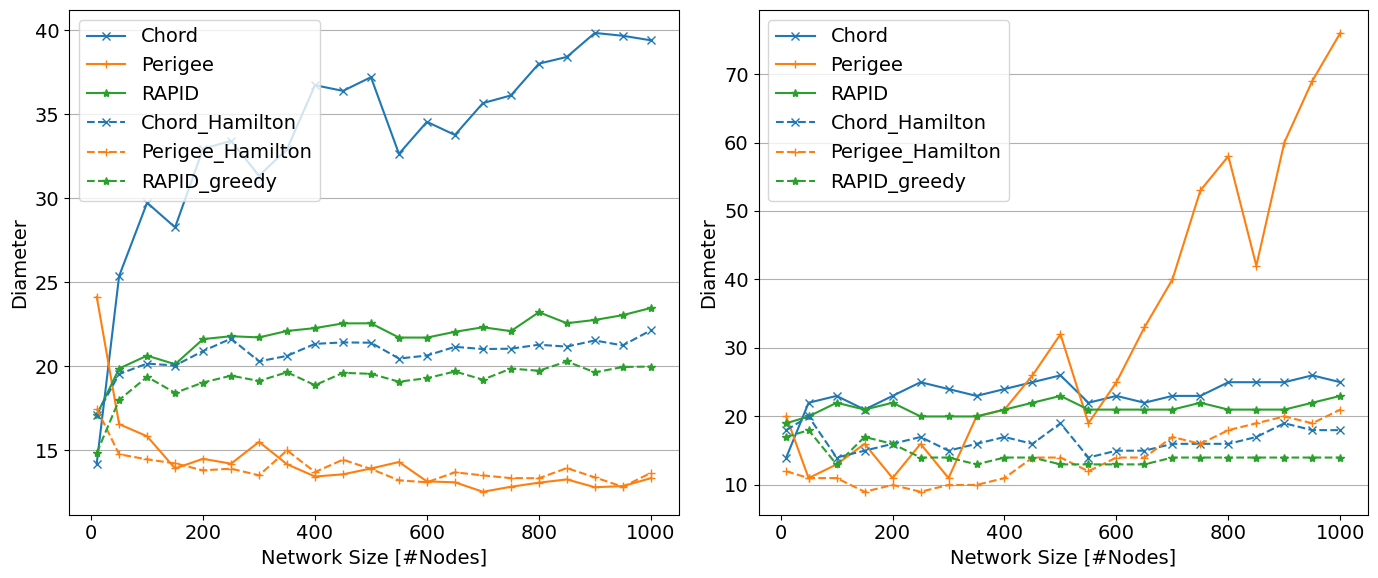

In [24]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
font = {
        'size'   : 14}
matplotlib.rc('font', **font)
N_list = [10]
seed = 1
for i in range(50, 1001, 50):
    N_list.append(i)
# labels = ['Chord', 'NN', 'RAPID', 'Perigee', 'Ours']
labels = ['Chord', 'Perigee', 'RAPID']
hatches = ["x", "/", ".", "\\",'']
tab10 = sns.color_palette("tab10", n_colors=5)
face_colors = tab10
x_tickslabel = N_list
width = 0.15
markers = ['x', '+', '*', 'o', 'P']
fig, axs = plt.subplots(ncols=2, figsize=(14, 6))
datas = [data_gaussian, data_uniform]
for j in range(2):
	ax = axs[j]
	data = datas[j]
	print(j, data['Ours_greedy'])
	for i, label in enumerate(labels):
		print(label, data[label])
		ax.plot(N_list, data[label], label=label, color=face_colors[i], marker=markers[i])
	ax.plot(N_list, data['Chord_Hamilton'], linestyle='--',label='Chord_Hamilton', 
			color=face_colors[0], marker=markers[0])
	ax.plot(N_list, data['Perigee_Hamilton'], linestyle='--',
			label='Perigee_Hamilton', color=face_colors[1], marker=markers[1])
	ax.plot(N_list, data['Ours'], linestyle='--',label='RAPID_greedy',
			color=face_colors[2], marker=markers[2])
	# ax.plot(N_list, data['Ours_greedy'], label='Ours_greedy',
	# 		color=face_colors[3], marker=markers[3])
	ax.set_ylabel('Diameter')
	# ax.set_yticks([0, 250, 500, 750, 1000])
	# ax.set_yticklabels(['0', '2.5', '5', '7.5', '10'])
	# ax.set_yticklabels(['0', '250', '500', '750', '1000'], rotation=90)
	# ax.set_title('Diameter of different algorithms')
	# ax.set_xticks(x + 2.5*width)
	# ax.set_xticklabels(x_tickslabel)
	ax.set_xlabel('Network Size [#Nodes]')
	# ax.legend(loc='upper left', bbox_to_anchor=(1.0, .95), frameon=False)
	ax.legend()
	ax.grid(axis='y')
	# ax.set_ylim([0, 850])
	plt.tight_layout()
	# plt.show()
	# plt.savefig("diameter.png", bbox_inches='tight',)
	# plt.savefig("diameter.pdf", bbox_inches='tight')
plt.savefig("./fig/benchmark_synthetic_hamilton.pdf", bbox_inches='tight')


0 [17.823687694063217, 15.184251963611663, 13.4654790123294, 13.282930833153994, 13.199584114828783, 13.234469542466435, 12.40893478576837, 12.19623185327167, 12.499265012970593, 12.546288007417868, 12.305132316990884, 12.203441406790754, 11.827583595177412, 12.18837422892465, 12.06221317508527, 11.720593685901894, 12.082419003626764, 12.300895275735643, 11.975568804492998, 12.009785328854628, 11.695011268039917]
Chord [14.218662992582889, 25.379713649573592, 29.745948882996043, 28.278755948099242, 32.95795948815675, 33.42920433391514, 31.352265071492635, 32.934293807624165, 36.743206097122425, 36.40219388577873, 37.218499382039205, 32.656621838123975, 34.560452923300055, 33.7790368599341, 35.6737578915266, 36.13223054024883, 38.023293714184796, 38.423581763725274, 39.85237179448408, 39.684106883264846, 39.41488188993464]
Perigee [24.14603524334469, 16.56395012701507, 15.841817413996338, 13.925203297962247, 14.500785101448795, 14.208939451843337, 15.509266149677622, 14.176764401975976,

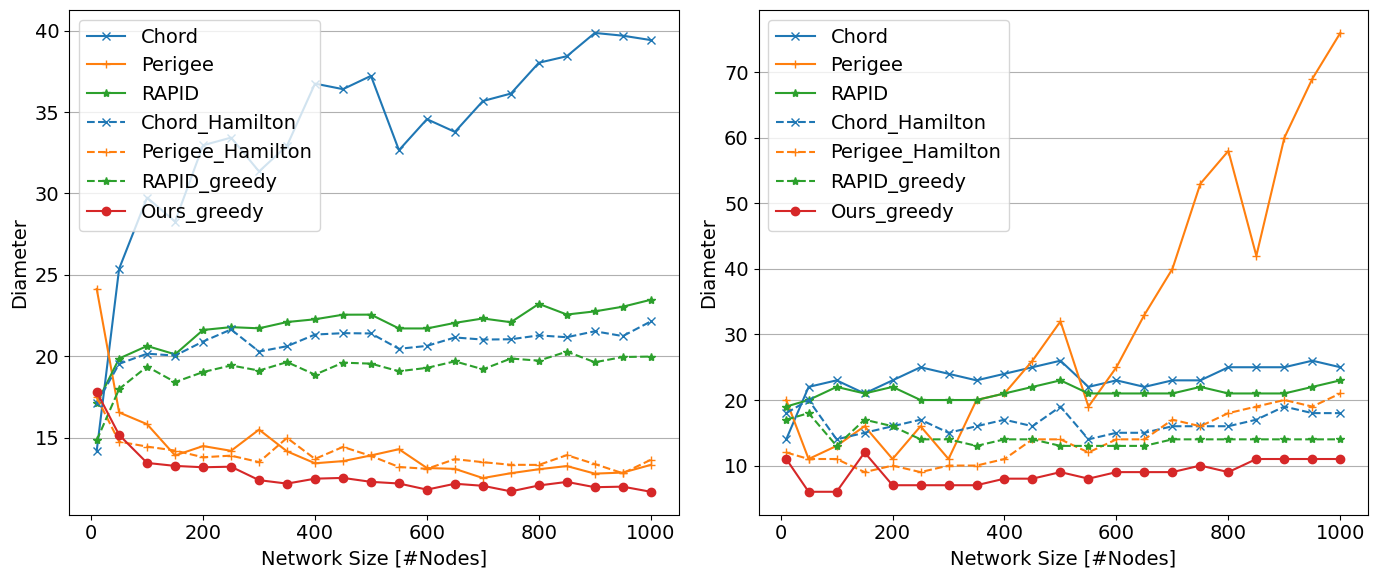

In [25]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
font = {
        'size'   : 14}
matplotlib.rc('font', **font)
N_list = [10]
seed = 1
for i in range(50, 1001, 50):
    N_list.append(i)
# labels = ['Chord', 'NN', 'RAPID', 'Perigee', 'Ours']
labels = ['Chord', 'Perigee', 'RAPID']
hatches = ["x", "/", ".", "\\",'']
tab10 = sns.color_palette("tab10", n_colors=5)
face_colors = tab10
x_tickslabel = N_list
width = 0.15
markers = ['x', '+', '*', 'o', 'P']
fig, axs = plt.subplots(ncols=2, figsize=(14, 6))
datas = [data_gaussian, data_uniform]
for j in range(2):
	ax = axs[j]
	data = datas[j]
	print(j, data['Ours_greedy'])
	for i, label in enumerate(labels):
		print(label, data[label])
		ax.plot(N_list, data[label], label=label, color=face_colors[i], marker=markers[i])
	ax.plot(N_list, data['Chord_Hamilton'], linestyle='--',label='Chord_Hamilton', 
			color=face_colors[0], marker=markers[0])
	ax.plot(N_list, data['Perigee_Hamilton'], linestyle='--',
			label='Perigee_Hamilton', color=face_colors[1], marker=markers[1])
	ax.plot(N_list, data['Ours'], linestyle='--',label='RAPID_greedy',
			color=face_colors[2], marker=markers[2])
	ax.plot(N_list, data['Ours_greedy'], label='Ours_greedy',
			color=face_colors[3], marker=markers[3])
	ax.set_ylabel('Diameter')
	# ax.set_yticks([0, 250, 500, 750, 1000])
	# ax.set_yticklabels(['0', '2.5', '5', '7.5', '10'])
	# ax.set_yticklabels(['0', '250', '500', '750', '1000'], rotation=90)
	# ax.set_title('Diameter of different algorithms')
	# ax.set_xticks(x + 2.5*width)
	# ax.set_xticklabels(x_tickslabel)
	ax.set_xlabel('Network Size [#Nodes]')
	# ax.legend(loc='upper left', bbox_to_anchor=(1.0, .95), frameon=False)
	ax.legend()
	ax.grid(axis='y')
	# ax.set_ylim([0, 850])
	plt.tight_layout()
	# plt.show()
	# plt.savefig("diameter.png", bbox_inches='tight',)
	# plt.savefig("diameter.pdf", bbox_inches='tight')
plt.savefig("./fig/benchmark_synthetic_all.pdf", bbox_inches='tight')


In [26]:
# Ablation
data_uniform_varying_random_ring = {'chord_shortest_ring': [], 'chord_random_ring': [], 'nearest_neighbour_shortest_ring': [], 'nearest_neighbour_random_ring': [], 'K_ring_shortest_ring': [], 'K_ring_random_ring': [], 'K_ring_greedy': [], 'K_ring_epsilon_greedy': [], 'K_ring_0_random': [9, 7, 6, 6, 7, 7, 7, 7, 8, 9, 9, 9, 10, 10, 9, 12, 12, 13, 14, 14, 14], 'K_ring_1_random': [11, 11, 6, 7, 8, 7, 7, 7, 8, 7, 8, 7, 7, 8, 9, 9, 8, 8, 8, 8, 8], 'K_ring_2_random': [12, 9, 8, 9, 7, 9, 7, 7, 8, 8, 8, 7, 7, 7, 9, 8, 7, 8, 8, 7, 8], 'K_ring_3_random': [23, 11, 9, 10, 9, 7, 8, 7, 8, 8, 8, 7, 8, 7, 8, 8, 8, 8, 8, 8, 8], 'K_ring_4_random': [0, 14, 10, 10, 9, 9, 8, 7, 8, 8, 9, 8, 7, 7, 8, 8, 8, 8, 8, 8, 8], 'K_ring_5_random': [0, 24, 13, 12, 12, 10, 9, 9, 9, 9, 10, 8, 9, 8, 9, 9, 9, 9, 9, 9, 8], 'K_ring_6_random': [0, 0, 21, 14, 14, 13, 10, 10, 11, 11, 11, 9, 9, 9, 10, 10, 11, 9, 9, 9, 11], 'K_ring_7_random': [0, 0, 0, 20, 20, 21, 13, 13, 15, 14, 14, 10, 11, 11, 11, 10, 10, 12, 11, 12, 11], 'K_ring_8_random': [0, 0, 0, 0, 0, 0, 21, 23, 22, 21, 22, 15, 13, 13, 14, 14, 14, 14, 14, 13, 14], 'K_ring_9_random': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 21, 21, 21, 21, 20, 21, 22, 22, 22, 22]}

In [27]:
data_gaussian_varying_random_ring = {'chord_shortest_ring': [], 'chord_random_ring': [], 'nearest_neighbour_shortest_ring': [], 'nearest_neighbour_random_ring': [], 'K_ring_shortest_ring': [], 'K_ring_random_ring': [], 'K_ring_greedy': [], 'K_ring_epsilon_greedy': [], 'K_ring_0_random': [16.501647112013316, 14.061283566705363, 14.121893200252565, 13.113245382915661, 12.839627249975095, 13.738080578843837, 12.430453946483807, 12.298290579920845, 12.515972776029772, 12.708756431223915, 12.252590189537404, 11.882168822532936, 11.722911784769458, 11.940080809585094, 12.310953195604066, 11.75634391175803, 11.73722616390091, 11.75935954280106, 11.860194090815096, 11.912712334136932, 11.979579019085143], 'K_ring_1_random': [18.35426463790561, 15.363083967229377, 14.63735691335972, 14.097635815181523, 13.574631553779138, 14.771274851701799, 13.083717040168844, 12.997300228922834, 12.91620937861286, 13.000229456839122, 13.146589994707174, 12.341185057850712, 12.815945112107228, 12.101509029537485, 12.293017132859571, 12.135121707294683, 12.412655182386054, 12.351553879258859, 12.028644822977395, 12.403465218420026, 12.229067513366868], 'K_ring_2_random': [15.122935783885843, 16.154152085685187, 14.916762471142922, 13.972799125278389, 14.534110304245896, 14.830590742241116, 13.565241864193816, 13.51377185136305, 13.456497273220291, 13.723680960643593, 13.632176327903318, 12.899711263609198, 12.722500643842366, 12.723240116104433, 12.648730781681266, 12.685308133049551, 12.974251381304128, 12.755369431566361, 12.775876105002297, 12.625800361254244, 12.818196583444077], 'K_ring_3_random': [18.11697441747252, 17.561196700053454, 15.714112724149953, 15.322562480906967, 15.72154809040481, 15.490863655361444, 14.26433340204662, 14.25189223905376, 14.652200727721157, 14.598236543671925, 14.292761715549549, 13.399826079328808, 13.19793182660252, 13.127140225496134, 13.311822371102922, 14.03703191959418, 13.714362805651263, 13.656302190323332, 13.22604687035625, 13.75592443277058, 13.576055894390198], 'K_ring_4_random': [0, 18.701388873104044, 17.469001813706434, 15.788068272780944, 16.075206569998958, 16.162471174383228, 15.720620450224814, 15.548618898961418, 15.287940069682074, 15.079644877059414, 15.39926221192352, 14.046507635177491, 14.161797557054278, 14.074535938101448, 14.334058114037997, 14.130672611228896, 14.485805901697585, 14.194621854020127, 14.281656491793445, 14.600932317758762, 14.13075062141769], 'K_ring_5_random': [0, 19.789581175834346, 19.193524969012117, 17.02000046439277, 17.39897449596371, 17.994990303974436, 16.280943965525385, 16.584339274051562, 16.559393995360747, 16.571729880535834, 16.572499360849136, 15.092688524972814, 15.074372205470091, 15.133585160047947, 15.054094546690525, 15.287555233068051, 15.483658935237075, 15.135230397553341, 15.85373679003369, 15.14800406241598, 15.316696567608936], 'K_ring_6_random': [0, 0, 22.349304920331896, 18.45458287368428, 19.090702182787442, 19.62168683742732, 17.318675849137417, 17.48369826944512, 17.720781859744037, 18.11780728323582, 18.403200340093647, 16.20399660010884, 16.52710956282667, 16.101926857297656, 16.223460867444736, 16.27609714565811, 16.491585895035485, 16.376501617004422, 16.446136797972308, 16.640460146351955, 16.54922971372997], 'K_ring_7_random': [0, 0, 0, 20.269455995447206, 21.660437844061413, 21.55231075286069, 19.488788778503775, 19.064571272542, 19.167078291359164, 19.708174536236214, 19.970085347882623, 17.46788800749051, 17.529913637849788, 17.71282593021634, 17.62076052683858, 17.83681921465879, 18.043193726824775, 18.175888610436164, 18.229671337482113, 18.44536115944149, 18.163789134608443], 'K_ring_8_random': [0, 0, 0, 0, 0, 0, 20.81829996651149, 21.7778960615418, 21.90653249725328, 22.148134945906552, 22.302000566479748, 19.16462990913353, 18.893655833279077, 19.137351655592386, 19.326244322853167, 19.578209350453786, 19.822001120833416, 19.833765542531644, 19.77915731350386, 19.81812345239896, 19.630331441459774], 'K_ring_9_random': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 21.740015836704984, 22.06713171739949, 22.121590677486736, 22.742348303761034, 22.36010445943767, 22.721323305840503, 22.495600182079443, 22.99894812932162, 23.324309980175215, 23.43843430947624]}

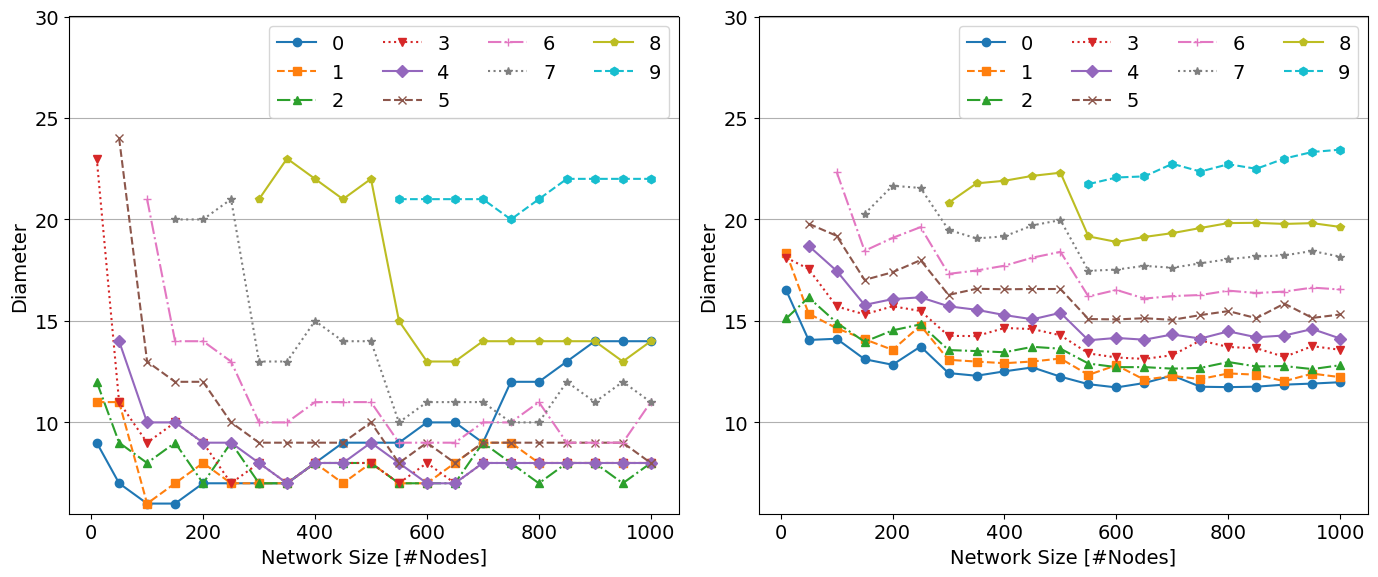

In [28]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
font = {
        'size'   : 14}
matplotlib.rc('font', **font)
N_list = [10]
seed = 1
for i in range(50, 1001, 50):
    N_list.append(i)
# labels = ['Chord', 'NN', 'RAPID', 'Perigee', 'Ours']
labels = ['Chord', 'Perigee', 'RAPID']
hatches = ["x", "/", ".", "\\",'']
tab10 = sns.color_palette("tab10", n_colors=10)
face_colors = tab10
x_tickslabel = N_list
width = 0.15
markers = ['x', '+', '*', 'o', 'P']
markers = ['o', 's', '^', 'v', 'D', 'x', '+', '*', 'p', 'h']
linestyles = ['-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--']
fig, axs = plt.subplots(ncols=2, figsize=(14, 6))
datas = [data_gaussian, data_uniform, 
		 data_uniform_varying_random_ring,
		   data_gaussian_varying_random_ring]
for j in range(2):
	ax = axs[j]
	data = datas[j + 2]
	for i in range(10):
		# print(label, data[label])
		# print(len( data[f'K_ring_{i}_random']))
		k = 0
		while data[f'K_ring_{i}_random'][k] == 0:
			k += 1
		ax.plot(N_list[k:], data[f'K_ring_{i}_random'][k:], label=f'{i}', linestyle=linestyles[i], color=face_colors[i], marker=markers[i])
	ax.set_ylabel('Diameter')
	# ax.set_yticks([0, 250, 500, 750, 1000])
	# ax.set_yticklabels(['0', '2.5', '5', '7.5', '10'])
	# ax.set_yticklabels(['0', '250', '500', '750', '1000'], rotation=90)
	# ax.set_title('Diameter of different algorithms')
	# ax.set_xticks(x + 2.5*width)
	# ax.set_xticklabels(x_tickslabel)
	ax.set_ylim([5.5, 30])
	ax.set_xlabel('Network Size [#Nodes]')
	# ax.legend(loc='upper left', bbox_to_anchor=(1.0, .95), frameon=False)
	ax.legend(ncols=4)
	ax.grid(axis='y')
	# ax.set_ylim([0, 850])
	plt.tight_layout()
	# plt.show()
	# plt.savefig("diameter.png", bbox_inches='tight',)
	# plt.savefig("diameter.pdf", bbox_inches='tight')
plt.savefig("./fig/benchmark_synthetic_ablation.pdf", bbox_inches='tight')


In [29]:
data_distribute_uniform = {'chord_shortest_ring': [], 'chord_random_ring': [], 'nearest_neighbour_shortest_ring': [], 'nearest_neighbour_random_ring': [], 'K_ring_shortest_ring': [], 'K_ring_random_ring': [], 'K_ring_greedy': [], 'K_ring_epsilon_greedy': [], 'K_ring_random_distributed_stride_1': [19, 20, 22, 21, 22, 20, 20, 20, 21, 22, 23, 21, 21, 21, 21, 22, 21, 21, 21, 22, 23], 'K_ring_random_distributed_stride_2': [23, 21, 20, 20, 23, 23, 21, 20, 22, 21, 21, 21, 20, 19, 21, 21, 21, 21, 21, 22, 22], 'K_ring_random_distributed_stride_4': [15, 18, 17, 15, 16, 16, 15, 17, 17, 16, 18, 16, 15, 16, 15, 17, 15, 17, 17, 17, 16], 'K_ring_random_distributed_stride_8': [16, 14, 11, 10, 11, 11, 10, 11, 11, 12, 11, 10, 11, 11, 11, 10, 11, 10, 13, 11, 12], 'K_ring_random_distributed_stride_16': [14, 11, 9, 8, 8, 8, 8, 8, 7, 8, 8, 8, 7, 7, 8, 8, 8, 8, 8, 7, 8], 'K_ring_random_distributed_stride_32': [13, 10, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6], 'K_ring_random_distributed_stride_64': [12, 7, 6, 6, 6, 6, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6], 'K_ring_random_distributed_stride_128': [9, 8, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], 'K_ring_random_distributed_stride_256': [14, 7, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], 'K_ring_random_distributed_stride_512': [10, 8, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]}

In [30]:
data_distribute_gaussian =  {'chord_shortest_ring': [], 'chord_random_ring': [], 'nearest_neighbour_shortest_ring': [], 'nearest_neighbour_random_ring': [], 'K_ring_shortest_ring': [], 'K_ring_random_ring': [], 'K_ring_greedy': [], 'K_ring_epsilon_greedy': [], 'K_ring_random_distributed_stride_1': [17.113593510831976, 19.873203605040356, 20.642301801539666, 20.129638579576923, 21.625570211176207, 21.79853015407059, 21.725980973293957, 22.111557040993745, 22.28038568446951, 22.561385958552258, 22.565935280910548, 21.718236187099834, 21.716943987617412, 22.059551108585385, 22.33019043326987, 22.100976725567392, 23.226240656251278, 22.57236046751093, 22.765136536752234, 23.052739404023207, 23.47766261991042], 'K_ring_random_distributed_stride_2': [18.11697441747252, 21.413585186688792, 21.199685386341947, 20.493760844792796, 21.843371362414466, 22.6001830128225, 20.7467936044633, 21.531967988617815, 21.766918307290865, 21.97342311802374, 22.327007824498516, 21.585464088182306, 21.90794611478765, 21.98579829034066, 21.955362916378697, 22.416006947164444, 22.49510164520663, 23.055666951916734, 23.126550822754126, 23.03801259044578, 23.07587497011833], 'K_ring_random_distributed_stride_4': [13.688866486721427, 18.158831079072865, 18.669485527805907, 19.26713839651717, 19.680213226232265, 20.17153461630919, 20.011405530261055, 19.810557961752423, 20.62274201488906, 21.22392833683613, 20.755377246411115, 20.414235016575535, 20.16447148101394, 20.44349834735487, 20.646946111232054, 20.780920887293675, 20.906064790853268, 21.542137098686364, 22.13004318722173, 21.72884696915855, 21.74747538334161], 'K_ring_random_distributed_stride_8': [15.817807155808174, 18.818242156922935, 17.621846257549336, 17.619948095234378, 18.08459383326121, 18.755046703962357, 17.35947501607761, 18.536552141418323, 18.26056475522499, 18.55674921249835, 19.101442473204248, 18.073749415498334, 18.61207904949521, 18.367983808698682, 19.006056387813103, 19.630576621992994, 19.818186226495573, 18.91074129082304, 19.447626108270995, 19.595970716190227, 19.504649368499102], 'K_ring_random_distributed_stride_16': [18.666903925091077, 17.434237657305673, 16.51972476100192, 16.663279898757317, 17.56124192065864, 16.80399621781904, 16.181985158342517, 16.543268592654442, 16.868195135020912, 17.27095531761732, 17.333651863917627, 16.869129750071874, 17.399558524156284, 16.772235129089644, 17.182093988732046, 16.939599000567092, 17.24794170984805, 17.49383536568639, 17.328262045201374, 17.776784586607178, 17.508532842305563], 'K_ring_random_distributed_stride_32': [19.908276177141158, 19.98906450038702, 16.512144680988605, 15.53388498480073, 15.881182054749145, 16.253115776943094, 15.561246072748077, 15.41932829569001, 15.675945222794379, 15.723192608421643, 15.725459287292356, 15.698610997222247, 15.675386101932133, 15.579735843854174, 15.34671100872901, 15.722476230212298, 15.84096420807857, 15.671860897654584, 16.415705263074024, 16.31957517518934, 16.107792858194475], 'K_ring_random_distributed_stride_64': [18.695442267409724, 26.803842846802684, 17.54932440850989, 16.148214081196198, 16.014875087388535, 15.316459721621083, 14.944994795382655, 14.69460661154416, 14.92806645982365, 14.844705783892305, 14.874231011993214, 14.587343511757718, 14.444797807811714, 14.371004829012605, 14.650027011668076, 14.640640532674082, 14.848221021462924, 14.773760540548864, 14.893410825163667, 14.787858969668168, 14.966855436806636], 'K_ring_random_distributed_stride_128': [25.904674558220584, 30.394410175629034, 36.51891811099723, 19.804434734917518, 17.55338478963684, 16.211505160872367, 14.887530788198443, 14.725139471462564, 14.804313644898674, 14.989394970541419, 14.437680928668868, 13.961296432705952, 13.864322145659981, 13.963033814990055, 13.902869711631348, 13.839365192986532, 13.979760790453415, 13.895128313465946, 14.204692804831186, 13.872136630157827, 14.252825602822497], 'K_ring_random_distributed_stride_256': [25.803255249843236, 29.254190417253383, 32.392756185101355, 54.439385398493265, 53.17638994528262, 39.76620906862606, 18.4650538074715, 16.78661697925271, 16.36453113289348, 16.05997841765479, 15.722157598048318, 15.120934413677308, 14.728245050373722, 14.014586991367597, 14.221604366203293, 13.970034978427865, 14.263481748354591, 13.921000800157447, 13.666160185941173, 13.931701869086154, 13.515311634419657], 'K_ring_random_distributed_stride_512': [38.446051954889406, 53.392521684022384, 35.51832551971695, 85.06376517623254, 48.088540067733824, 35.3203522071871, 39.656914414405385, 75.59237186786471, 47.376951966921666, 64.10541749922498, 47.711579357901634, 23.08337818868475, 18.200539651677758, 16.321123220548422, 15.823172281982714, 15.871500857082365, 15.11512748041999, 14.885160986823912, 14.858784598914971, 15.120982437269427, 15.278944025851748]}

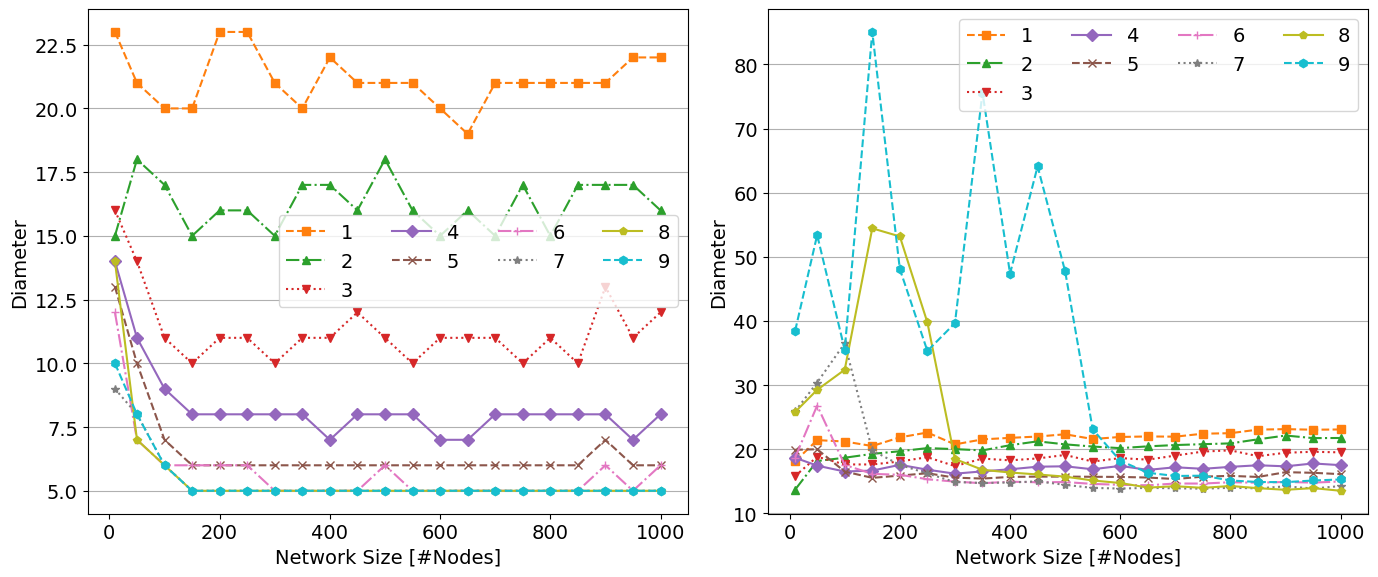

In [31]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
font = {
        'size'   : 14}
matplotlib.rc('font', **font)
N_list = [10]
seed = 1
for i in range(50, 1001, 50):
    N_list.append(i)
# labels = ['Chord', 'NN', 'RAPID', 'Perigee', 'Ours']
labels = ['Chord', 'Perigee', 'RAPID']
hatches = ["x", "/", ".", "\\",'']
tab10 = sns.color_palette("tab10", n_colors=10)
face_colors = tab10
x_tickslabel = N_list
width = 0.15
markers = ['x', '+', '*', 'o', 'P']
markers = ['o', 's', '^', 'v', 'D', 'x', '+', '*', 'p', 'h']
linestyles = ['-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--']
fig, axs = plt.subplots(ncols=2, figsize=(14, 6))
datas = [data_distribute_uniform, data_distribute_gaussian]
for j in range(2):
	ax = axs[j]
	data = datas[j]
	for i in range(1, 10):
		# print(label, data[label])
		# print(len( data[f'K_ring_{i}_random']))
		# print(len(N_list), len(data[f'K_ring_random_distributed_stride_{i}']))
		ax.plot(N_list, data[f'K_ring_random_distributed_stride_{2 ** i}'], label=f'{i}', linestyle=linestyles[i], color=face_colors[i], marker=markers[i])
	ax.set_ylabel('Diameter')
	# ax.set_yticks([0, 250, 500, 750, 1000])
	# ax.set_yticklabels(['0', '2.5', '5', '7.5', '10'])
	# ax.set_yticklabels(['0', '250', '500', '750', '1000'], rotation=90)
	# ax.set_title('Diameter of different algorithms')
	# ax.set_xticks(x + 2.5*width)
	# ax.set_xticklabels(x_tickslabel)
	# ax.set_ylim([5.5, 30])
	ax.set_xlabel('Network Size [#Nodes]')
	# ax.legend(loc='upper left', bbox_to_anchor=(1.0, .95), frameon=False)
	ax.legend(ncols=4)
	ax.grid(axis='y')
	# ax.set_ylim([0, 850])
	plt.tight_layout()
	# plt.show()
	# plt.savefig("diameter.png", bbox_inches='tight',)
	# plt.savefig("diameter.pdf", bbox_inches='tight')
plt.savefig("./fig/benchmark_synthetic_distribute.pdf", bbox_inches='tight')


In [5]:
location_name = [
    "RUTG", "EDUKY", "MASS", "SRI", "PRIN", "TOKY", "CERN", 
    "DALL", "STAR", "UTAH", "MICH", "MAX", "AMST", "PSC", 
    "GATECH", "HAWI", "NCSA"
]
locations = {}
locations["RUTG"] = {"RUTG":0, "EDUKY":11.5, "MASS":9.3, "SRI":37, "PRIN":1.2, "TOKY":84.6, "CERN":46, 
    "DALL":18, "STAR":12, "UTAH":27.5, "MICH":14.4, "MAX":4.25, "AMST":45.09, "PSC":6.06, 
    "GATECH":10.08, "HAWI":57.9, "NCSA":22.3}
locations["EDUKY"] = {"RUTG":0, "EDUKY":0, "MASS":15, "SRI":30.2, "PRIN":16.85, "TOKY":80, "CERN":51, "DALL":23.1, "STAR":4.75, "UTAH":20.1, "MICH":7.3, "MAX":9.38, "AMST":70.85, "PSC":11.3, 
    "GATECH":15.25, "HAWI":50.72, "NCSA":15.1}

locations["MASS"] = {"RUTG":0, "EDUKY":0, "MASS":0, "SRI":42.5, "PRIN":9.5, "TOKY":88.6, "CERN":60.8, "DALL":21.3, "STAR":15.2, "UTAH":28.8, "MICH":15.93, "MAX":9.38, "AMST":60.7, "PSC":11.2, 
    "GATECH":15.3, "HAWI":61.2, "NCSA":23.8}
locations["SRI"] = {"RUTG":0, "EDUKY":0, "MASS":0, "SRI":0, "PRIN":37.5, "TOKY":53.5, "CERN":82.4, "DALL":22.3, "STAR":25.5, "UTAH":10.2, "MICH":28, "MAX":37.3, "AMST":81.5, "PSC":40, 
    "GATECH":15.3, "HAWI":43, "NCSA":35.8}
locations["PRIN"] = {"RUTG":0, "EDUKY":0, "MASS":0, "SRI":0, "PRIN":0, "TOKY":84.8, "CERN":46.1, "DALL":18.25, "STAR":12.1, "UTAH":27.5, "MICH":14.6, "MAX":4.3, "AMST":45.5, "PSC":6.26, 
    "GATECH":10.3, "HAWI":71.7, "NCSA":22.46}
locations["TOKY"] = {"RUTG":0, "EDUKY":0, "MASS":0, "SRI":0, "PRIN":0, "TOKY":0, "CERN":130.1, "DALL":67, "STAR":75, "UTAH":55.65, "MICH":77.8, "MAX":81, "AMST":128.7, "PSC":80.9, 
    "GATECH":85, "HAWI":74, "NCSA":83}
locations["CERN"] = {"RUTG":0, "EDUKY":0, "MASS":0, "SRI":0, "PRIN":0, "TOKY":0, "CERN":0, "DALL":69.5, "STAR":57, "UTAH":72.3, "MICH":59.45, "MAX":44, "AMST":8.3, "PSC":57.5, 
    "GATECH":52.3, "HAWI":116.6, "NCSA":67}
locations["DALL"] = {"RUTG":0, "EDUKY":0, "MASS":0, "SRI":0, "PRIN":0, "TOKY":0, "CERN":0, "DALL":0, "STAR":17.5, "UTAH":24, "MICH":12.2, "MAX":15.5, "AMST":61.4, "PSC":17.4, 
    "GATECH":21.4, "HAWI":41.7, "NCSA":12.4}
locations["STAR"] = {"RUTG":0, "EDUKY":0, "MASS":0, "SRI":0, "PRIN":0, "TOKY":0, "CERN":0, "DALL":0, "STAR":0, "UTAH":15.45, "MICH":2.6, "MAX":8.3, "AMST":56, "PSC":10.1, 
    "GATECH":14.4, "HAWI":46, "NCSA":10.4}
locations["UTAH"] = {"RUTG":0, "EDUKY":0, "MASS":0, "SRI":0, "PRIN":0, "TOKY":0, "CERN":0, "DALL":0, "STAR":0, "UTAH":0, "MICH":18, "MAX":24.46, "AMST":71.4, "PSC":25.6, 
    "GATECH":29.5, "HAWI":44.4, "NCSA":25.77}
locations["MICH"] = {"RUTG":0, "EDUKY":0, "MASS":0, "SRI":0, "PRIN":0, "TOKY":0, "CERN":0, "DALL":0, "STAR":0, "UTAH":0, "MICH":0, "MAX":10.8, "AMST":58.6, "PSC":12.7, 
    "GATECH":16.7, "HAWI":62.26, "NCSA":12.92}
locations["MAX"] = {"RUTG":0, "EDUKY":0, "MASS":0, "SRI":0, "PRIN":0, "TOKY":0, "CERN":0, "DALL":0, "STAR":0, "UTAH":0, "MICH":0, "MAX":0, "AMST":63.92, "PSC":4.26, 
    "GATECH":8.28, "HAWI":57.8, "NCSA":18.6}
locations["AMST"] = {"RUTG":0, "EDUKY":0, "MASS":0, "SRI":0, "PRIN":0, "TOKY":0, "CERN":0, "DALL":0, "STAR":0, "UTAH":0, "MICH":0, "MAX":0, "AMST":0, "PSC":50.3, 
    "GATECH":54.2, "HAWI":115.7, "NCSA":66.45}
locations["PSC"] = {"RUTG":0, "EDUKY":0, "MASS":0, "SRI":0, "PRIN":0, "TOKY":0, "CERN":0, "DALL":0, "STAR":0, "UTAH":0, "MICH":0, "MAX":0, "AMST":0, "PSC":0, 
    "GATECH":10.13, "HAWI":59.72, "NCSA":20.46}
locations["GATECH"] = {"RUTG":0, "EDUKY":0, "MASS":0, "SRI":0, "PRIN":0, "TOKY":0, "CERN":0, "DALL":0, "STAR":0, "UTAH":0, "MICH":0, "MAX":0, "AMST":0, "PSC":0, 
    "GATECH":0, "HAWI":80.14, "NCSA":24.5}
locations["HAWI"] = {"RUTG":0, "EDUKY":0, "MASS":0, "SRI":0, "PRIN":0, "TOKY":0, "CERN":0, "DALL":0, "STAR":0, "UTAH":0, "MICH":0, "MAX":0, "AMST":0, "PSC":0, 
    "GATECH":0, "HAWI":0, "NCSA":74}
locations["NCSA"] = {"RUTG":0, "EDUKY":0, "MASS":0, "SRI":0, "PRIN":0, "TOKY":0, "CERN":0, "DALL":0, "STAR":0, "UTAH":0, "MICH":0, "MAX":0, "AMST":0, "PSC":0, 
    "GATECH":0, "HAWI":0, "NCSA":0}


In [6]:
location_name = [
    "RUTG", "EDUKY", "MASS", "SRI", "PRIN", "TOKY", "CERN", 
    "DALL", "STAR", "UTAH", "MICH", "MAX", "AMST", "PSC", 
    "GATECH", "HAWI", "NCSA"
]
locations = {}
locations["RUTG"] = {"RUTG":0, "EDUKY":11.5, "MASS":9.3, "SRI":37, "PRIN":1.2, "TOKY":84.6, "CERN":46, 
    "DALL":18, "STAR":12, "UTAH":27.5, "MICH":14.4, "MAX":4.25, "AMST":45.09, "PSC":6.06, 
    "GATECH":10.08, "HAWI":57.9, "NCSA":22.3}
locations["EDUKY"] = {"RUTG":0, "EDUKY":0, "MASS":15, "SRI":30.2, "PRIN":16.85, "TOKY":80, "CERN":51, "DALL":23.1, "STAR":4.75, "UTAH":20.1, "MICH":7.3, "MAX":9.38, "AMST":70.85, "PSC":11.3, 
    "GATECH":15.25, "HAWI":50.72, "NCSA":15.1}

locations["MASS"] = {"RUTG":0, "EDUKY":0, "MASS":0, "SRI":42.5, "PRIN":9.5, "TOKY":88.6, "CERN":60.8, "DALL":21.3, "STAR":15.2, "UTAH":28.8, "MICH":15.93, "MAX":9.38, "AMST":60.7, "PSC":11.2, 
    "GATECH":15.3, "HAWI":61.2, "NCSA":23.8}
locations["SRI"] = {"RUTG":0, "EDUKY":0, "MASS":0, "SRI":0, "PRIN":37.5, "TOKY":53.5, "CERN":82.4, "DALL":22.3, "STAR":25.5, "UTAH":10.2, "MICH":28, "MAX":37.3, "AMST":81.5, "PSC":40, 
    "GATECH":15.3, "HAWI":43, "NCSA":35.8}
locations["PRIN"] = {"RUTG":0, "EDUKY":0, "MASS":0, "SRI":0, "PRIN":0, "TOKY":84.8, "CERN":46.1, "DALL":18.25, "STAR":12.1, "UTAH":27.5, "MICH":14.6, "MAX":4.3, "AMST":45.5, "PSC":6.26, 
    "GATECH":10.3, "HAWI":71.7, "NCSA":22.46}
locations["TOKY"] = {"RUTG":0, "EDUKY":0, "MASS":0, "SRI":0, "PRIN":0, "TOKY":0, "CERN":130.1, "DALL":67, "STAR":75, "UTAH":55.65, "MICH":77.8, "MAX":81, "AMST":128.7, "PSC":80.9, 
    "GATECH":85, "HAWI":74, "NCSA":83}
locations["CERN"] = {"RUTG":0, "EDUKY":0, "MASS":0, "SRI":0, "PRIN":0, "TOKY":0, "CERN":0, "DALL":69.5, "STAR":57, "UTAH":72.3, "MICH":59.45, "MAX":44, "AMST":8.3, "PSC":57.5, 
    "GATECH":52.3, "HAWI":116.6, "NCSA":67}
locations["DALL"] = {"RUTG":0, "EDUKY":0, "MASS":0, "SRI":0, "PRIN":0, "TOKY":0, "CERN":0, "DALL":0, "STAR":17.5, "UTAH":24, "MICH":12.2, "MAX":15.5, "AMST":61.4, "PSC":17.4, 
    "GATECH":21.4, "HAWI":41.7, "NCSA":12.4}
locations["STAR"] = {"RUTG":0, "EDUKY":0, "MASS":0, "SRI":0, "PRIN":0, "TOKY":0, "CERN":0, "DALL":0, "STAR":0, "UTAH":15.45, "MICH":2.6, "MAX":8.3, "AMST":56, "PSC":10.1, 
    "GATECH":14.4, "HAWI":46, "NCSA":10.4}
locations["UTAH"] = {"RUTG":0, "EDUKY":0, "MASS":0, "SRI":0, "PRIN":0, "TOKY":0, "CERN":0, "DALL":0, "STAR":0, "UTAH":0, "MICH":18, "MAX":24.46, "AMST":71.4, "PSC":25.6, 
    "GATECH":29.5, "HAWI":44.4, "NCSA":25.77}
locations["MICH"] = {"RUTG":0, "EDUKY":0, "MASS":0, "SRI":0, "PRIN":0, "TOKY":0, "CERN":0, "DALL":0, "STAR":0, "UTAH":0, "MICH":0, "MAX":10.8, "AMST":58.6, "PSC":12.7, 
    "GATECH":16.7, "HAWI":62.26, "NCSA":12.92}
locations["MAX"] = {"RUTG":0, "EDUKY":0, "MASS":0, "SRI":0, "PRIN":0, "TOKY":0, "CERN":0, "DALL":0, "STAR":0, "UTAH":0, "MICH":0, "MAX":0, "AMST":63.92, "PSC":4.26, 
    "GATECH":8.28, "HAWI":57.8, "NCSA":18.6}
locations["AMST"] = {"RUTG":0, "EDUKY":0, "MASS":0, "SRI":0, "PRIN":0, "TOKY":0, "CERN":0, "DALL":0, "STAR":0, "UTAH":0, "MICH":0, "MAX":0, "AMST":0, "PSC":50.3, 
    "GATECH":54.2, "HAWI":115.7, "NCSA":66.45}
locations["PSC"] = {"RUTG":0, "EDUKY":0, "MASS":0, "SRI":0, "PRIN":0, "TOKY":0, "CERN":0, "DALL":0, "STAR":0, "UTAH":0, "MICH":0, "MAX":0, "AMST":0, "PSC":0, 
    "GATECH":10.13, "HAWI":59.72, "NCSA":20.46}
locations["GATECH"] = {"RUTG":0, "EDUKY":0, "MASS":0, "SRI":0, "PRIN":0, "TOKY":0, "CERN":0, "DALL":0, "STAR":0, "UTAH":0, "MICH":0, "MAX":0, "AMST":0, "PSC":0, 
    "GATECH":0, "HAWI":80.14, "NCSA":24.5}
locations["HAWI"] = {"RUTG":0, "EDUKY":0, "MASS":0, "SRI":0, "PRIN":0, "TOKY":0, "CERN":0, "DALL":0, "STAR":0, "UTAH":0, "MICH":0, "MAX":0, "AMST":0, "PSC":0, 
    "GATECH":0, "HAWI":0, "NCSA":74}
locations["NCSA"] = {"RUTG":0, "EDUKY":0, "MASS":0, "SRI":0, "PRIN":0, "TOKY":0, "CERN":0, "DALL":0, "STAR":0, "UTAH":0, "MICH":0, "MAX":0, "AMST":0, "PSC":0, 
    "GATECH":0, "HAWI":0, "NCSA":0}

for i in range(len(location_name)):
    for j in range(i):
        locations[location_name[i]][location_name[j]] = locations[location_name[j]][location_name[i]]

In [9]:
data_fabric = {'chord_shortest_ring': [159.2693457781955, 178.19533012883957, 172.81228891355738, 165.52429300436143, 159.85961014036377, 157.95581807512377, 158.81234167434403, 178.66422411011294, 176.55423763904753, 179.6447819496794, 163.04461021793338, 161.4009815813338, 185.742927095294, 179.67291391260778, 160.10280154724495, 160.05216816568355, 161.90203694856203, 160.84258574392678, 162.98973877615725, 160.75570557340532, 179.1532508476365], 'chord_random_ring': [170.16314579774547, 196.95508219376737, 194.16046221911435, 205.5063280137325, 220.15178505900099, 239.28345451118764, 212.75091213959558, 216.9048749974695, 224.00411175945163, 227.85893017339498, 229.45875713567608, 217.16705071126603, 219.7785026570491, 227.4245639317251, 227.95405425592296, 221.57249029030885, 224.94228007358336, 233.35550411192293, 234.1043086276696, 233.59439703815394, 239.05238892866964], 'nearest_neighbour_shortest_ring': [172.5950318599141, 368.7503415329627, 608.5591031794329, 578.4335445875289, 574.7221757154365, 595.5349407684866, 573.0089311357198, 612.3223363249144, 624.869886248274, 626.778981261705, 586.1009826423509, 562.5706521531856, 592.7020570947996, 614.1901574670278, 589.303643623634, 591.2345044280081, 594.993093323184, 581.5034556233538, 578.2883205028968, 606.1398837671911, 637.3630383295691], 'nearest_neighbour_random_ring': [165.30012725797093, 163.48186090673607, 171.8042404527754, 167.70718093834367, 159.3179533976024, 153.93947354951743, 156.40145588434558, 161.0197605376563, 155.90933075028627, 157.94682567648755, 154.23154875780585, 153.21967927239655, 154.73130087070012, 151.82343555573726, 154.02687343903023, 153.3762894079375, 153.45213100367073, 153.6851232291039, 154.12352630860653, 156.24392361901263, 152.94049699324157], 'K_ring_shortest_ring': [173.81780452805373, 155.405160100805, 164.29776883553987, 171.5095670812794, 192.94053689307407, 163.48615546623978, 159.75807211006088, 160.20938712918797, 190.70434032802632, 160.2486507457347, 167.27689726663033, 160.65595844985654, 166.00413494605812, 199.6687576021473, 187.39443284401003, 174.36972667513083, 160.11814032186916, 185.1356343633745, 160.35995805945802, 160.21831923187835, 171.61976378259084], 'K_ring_random_ring': [185.05527513243825, 189.90546909884566, 198.73263935378714, 202.86741813005787, 187.6962955763506, 204.20756889346973, 202.7791141482938, 204.2214076986656, 199.51414666053233, 217.38130046673433, 206.8776787314577, 205.8740628409748, 207.05898141404958, 209.4945501147022, 205.77853711191594, 202.97971994498164, 203.35799865530728, 204.95678132852265, 209.30254054952826, 209.97682745590487, 208.80661662551375], 'K_ring_greedy': [136.32450770480548, 175.97216114356866, 167.3885510884924, 150.35268321204106, 168.04469626591455, 189.8181412534353, 160.18900178097311, 154.07556386722857, 162.18756120819057, 166.281933526262, 158.64011971979897, 200.25626309837514, 157.6972231874548, 169.00485408283524, 158.36619435445033, 156.27690510322026, 164.62207613581384, 166.18218395798002, 164.8160320575409, 161.13153856147122, 168.08892246316], 'K_ring_epsilon_greedy': [166.48226325549496, 156.69703917552653, 150.2370119806576, 157.23140962088866, 157.89775755535373, 157.46591139156322, 158.48615793261555, 149.09095285045933, 154.63150525517887, 153.6491730918279, 166.4485530420904, 157.7589965140788, 161.51607945857984, 163.41217954047738, 158.6150143026813, 166.1119346208482, 168.71419384840758, 165.3799208699124, 159.2923387886049, 157.39205227412288, 158.085181825117]}
data_fabric['Chord'] = data_fabric['chord_random_ring']
data_fabric['Chord_Hamilton'] = data_fabric['chord_shortest_ring']
data_fabric['NN'] = data_fabric['nearest_neighbour_shortest_ring']
data_fabric['NN_Hamilton'] = data_fabric['nearest_neighbour_random_ring']
data_fabric['Perigee'] = data_fabric['nearest_neighbour_shortest_ring']
data_fabric['Perigee_Hamilton'] = data_fabric['nearest_neighbour_random_ring']
data_fabric['RAPID'] = data_fabric['K_ring_random_ring']
# data['Perigee'] = data_perigee
data_fabric['Ours'] = data_fabric['K_ring_shortest_ring']
data_fabric['Ours_greedy'] = data_fabric['K_ring_epsilon_greedy']
# for i in range(len(data_fabric['Ours_greedy'])):
#     data_fabric['Ours_greedy'][i] = min(data_fabric['K_ring_epsilon_greedy'][i], data_fabric['K_ring_greedy'][i])

In [10]:
data_bitnode = {'chord_shortest_ring': [400, 380, 560, 410, 430, 450, 430, 460, 430, 400, 420, 400, 380, 400, 400, 470, 410, 470, 450, 450, 370], 'chord_random_ring': [520, 540, 570, 650, 610, 670, 620, 590, 630, 630, 680, 630, 680, 640, 630, 650, 720, 700, 710, 710, 710], 'nearest_neighbour_shortest_ring': [300, 420, 780, 780, 1040, 840, 740, 720, 630, 950, 730, 590, 620, 920, 690, 750, 1220, 1050, 480, 1000, 830], 'nearest_neighbour_random_ring': [410, 380, 580, 370, 420, 420, 350, 410, 290, 380, 330, 360, 430, 300, 280, 350, 340, 290, 300, 360, 280], 'K_ring_shortest_ring': [380, 410, 410, 420, 580, 440, 430, 430, 400, 390, 400, 430, 370, 380, 390, 390, 460, 450, 380, 410, 400], 'K_ring_random_ring': [510, 490, 550, 610, 550, 660, 620, 650, 690, 650, 700, 620, 620, 660, 630, 670, 680, 690, 670, 710, 670], 'K_ring_greedy': [230, 310, 340, 380, 300, 310, 280, 270, 280, 310, 300, 260, 220, 300, 250, 210, 290, 240, 240, 250, 250], 'K_ring_epsilon_greedy': [420, 230, 380, 260, 300, 340, 280, 310, 240, 220, 270, 320, 280, 250, 230, 260, 220, 220, 250, 230, 240]}
data_bitnode['Chord'] = data_bitnode['chord_random_ring']
data_bitnode['Chord_Hamilton'] = data_bitnode['chord_shortest_ring']
data_bitnode['NN'] = data_bitnode['nearest_neighbour_shortest_ring']
data_bitnode['NN_Hamilton'] = data_bitnode['nearest_neighbour_random_ring']
data_bitnode['Perigee'] = data_bitnode['nearest_neighbour_shortest_ring']
data_bitnode['Perigee_Hamilton'] = data_bitnode['nearest_neighbour_random_ring']
data_bitnode['RAPID'] = data_bitnode['K_ring_random_ring']
# data['Perigee'] = data_perigee
data_bitnode['Ours'] = data_bitnode['K_ring_shortest_ring']
data_bitnode['Ours_greedy'] = data_bitnode['K_ring_epsilon_greedy']
# for i in range(len(data_bitnode['Ours_greedy'])):
#     data_bitnode['Ours_greedy'][i] = min(data_bitnode['K_ring_epsilon_greedy'][i], data_bitnode['K_ring_greedy'][i])

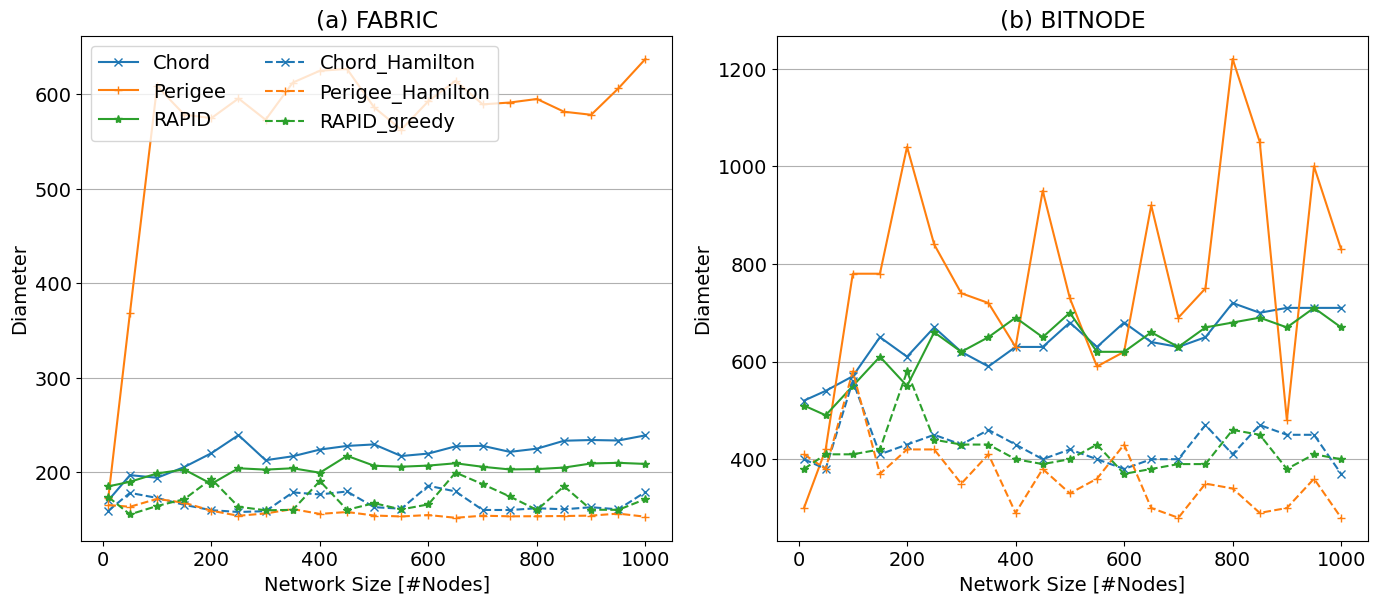

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
font = {
        'size'   : 14}
matplotlib.rc('font', **font)
N_list = [10]
seed = 1
for i in range(50, 1001, 50):
    N_list.append(i)
# labels = ['Chord', 'NN', 'RAPID', 'Perigee', 'Ours']
labels = ['Chord', 'Perigee', 'RAPID']
hatches = ["x", "/", ".", "\\",'']
tab10 = sns.color_palette("tab10", n_colors=5)
face_colors = tab10
x_tickslabel = N_list
width = 0.15
markers = ['x', '+', '*', 'o', 'P']
fig, axs = plt.subplots(ncols=2, figsize=(14, 6))
datas = [data_fabric, data_bitnode]
for j in range(2):
	ax = axs[j]
	data = datas[j]
	# print(j, data['Ours_greedy'])
	for i, label in enumerate(labels):
		# print(label, data[label])
		ax.plot(N_list, data[label], label=label, color=face_colors[i], marker=markers[i])
	ax.plot(N_list, data['Chord_Hamilton'], linestyle='--',label='Chord_Hamilton', 
			color=face_colors[0], marker=markers[0])
	ax.plot(N_list, data['Perigee_Hamilton'], linestyle='--',
			label='Perigee_Hamilton', color=face_colors[1], marker=markers[1])
	ax.plot(N_list, data['Ours'], linestyle='--',label='RAPID_greedy',
			color=face_colors[2], marker=markers[2])
	# ax.plot(N_list, data['Ours_greedy'], label='Ours',
	# 		color=face_colors[3], marker=markers[3])
	ax.set_ylabel('Diameter')
	# ax.set_yticks([0, 250, 500, 750, 1000])
	# ax.set_yticklabels(['0', '2.5', '5', '7.5', '10'])
	# ax.set_yticklabels(['0', '250', '500', '750', '1000'], rotation=90)
	# ax.set_title('Diameter of different algorithms')
	# ax.set_xticks(x + 2.5*width)
	# ax.set_xticklabels(x_tickslabel)
	ax.set_xlabel('Network Size [#Nodes]')
	# ax.legend(loc='upper left', bbox_to_anchor=(1.0, .95), frameon=False)
	# ax.legend()
	ax.grid(axis='y')
	# ax.set_ylim([0, 850])
	plt.tight_layout()
	# plt.show()
	# plt.savefig("diameter.png", bbox_inches='tight',)
axs[0].set_title("(a) FABRIC")
axs[0].legend(ncols=2, loc='upper left')
axs[1].set_title("(b) BITNODE")
plt.savefig("./fig/benchmark_real_hamilton.pdf", bbox_inches='tight')


0 [166.48226325549496, 156.69703917552653, 150.2370119806576, 157.23140962088866, 157.89775755535373, 157.46591139156322, 158.48615793261555, 149.09095285045933, 154.63150525517887, 153.6491730918279, 166.4485530420904, 157.7589965140788, 161.51607945857984, 163.41217954047738, 158.6150143026813, 166.1119346208482, 168.71419384840758, 165.3799208699124, 159.2923387886049, 157.39205227412288, 158.085181825117]
Chord [170.16314579774547, 196.95508219376737, 194.16046221911435, 205.5063280137325, 220.15178505900099, 239.28345451118764, 212.75091213959558, 216.9048749974695, 224.00411175945163, 227.85893017339498, 229.45875713567608, 217.16705071126603, 219.7785026570491, 227.4245639317251, 227.95405425592296, 221.57249029030885, 224.94228007358336, 233.35550411192293, 234.1043086276696, 233.59439703815394, 239.05238892866964]
Perigee [172.5950318599141, 368.7503415329627, 608.5591031794329, 578.4335445875289, 574.7221757154365, 595.5349407684866, 573.0089311357198, 612.3223363249144, 624.

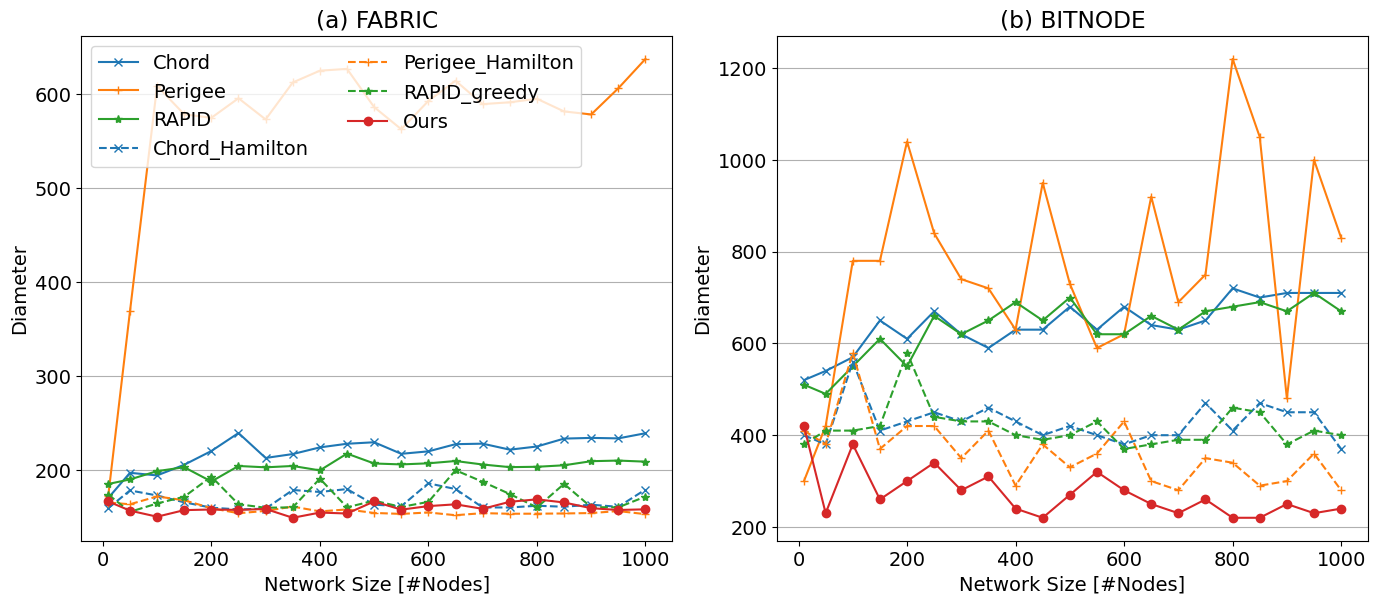

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
font = {
        'size'   : 14}
matplotlib.rc('font', **font)
N_list = [10]
seed = 1
for i in range(50, 1001, 50):
    N_list.append(i)
# labels = ['Chord', 'NN', 'RAPID', 'Perigee', 'Ours']
labels = ['Chord', 'Perigee', 'RAPID']
hatches = ["x", "/", ".", "\\",'']
tab10 = sns.color_palette("tab10", n_colors=5)
face_colors = tab10
x_tickslabel = N_list
width = 0.15
markers = ['x', '+', '*', 'o', 'P']
fig, axs = plt.subplots(ncols=2, figsize=(14, 6))
datas = [data_fabric, data_bitnode]
for j in range(2):
	ax = axs[j]
	data = datas[j]
	print(j, data['Ours_greedy'])
	for i, label in enumerate(labels):
		print(label, data[label])
		ax.plot(N_list, data[label], label=label, color=face_colors[i], marker=markers[i])
	ax.plot(N_list, data['Chord_Hamilton'], linestyle='--',label='Chord_Hamilton', 
			color=face_colors[0], marker=markers[0])
	ax.plot(N_list, data['Perigee_Hamilton'], linestyle='--',
			label='Perigee_Hamilton', color=face_colors[1], marker=markers[1])
	ax.plot(N_list, data['Ours'], linestyle='--',label='RAPID_greedy',
			color=face_colors[2], marker=markers[2])
	ax.plot(N_list, data['Ours_greedy'], label='Ours',
			color=face_colors[3], marker=markers[3])
	ax.set_ylabel('Diameter')
	# ax.set_yticks([0, 250, 500, 750, 1000])
	# ax.set_yticklabels(['0', '2.5', '5', '7.5', '10'])
	# ax.set_yticklabels(['0', '250', '500', '750', '1000'], rotation=90)
	# ax.set_title('Diameter of different algorithms')
	# ax.set_xticks(x + 2.5*width)
	# ax.set_xticklabels(x_tickslabel)
	ax.set_xlabel('Network Size [#Nodes]')
	# ax.legend(loc='upper left', bbox_to_anchor=(1.0, .95), frameon=False)
	# ax.legend()
	ax.grid(axis='y')
	# ax.set_ylim([0, 850])
	plt.tight_layout()
	# plt.show()
	# plt.savefig("diameter.png", bbox_inches='tight',)
axs[0].set_title("(a) FABRIC")
axs[0].legend(ncols=2, loc='upper left')
axs[1].set_title("(b) BITNODE")
plt.savefig("./fig/benchmark_real_all.pdf", bbox_inches='tight')


In [13]:
data_fabric_varying_random_ring = {'chord_shortest_ring': [], 'chord_random_ring': [], 'nearest_neighbour_shortest_ring': [], 'nearest_neighbour_random_ring': [], 'K_ring_shortest_ring': [], 'K_ring_random_ring': [], 'K_ring_greedy': [], 'K_ring_epsilon_greedy': [], 'K_ring_0_random': [193.37839231478344, 167.2980403884367, 227.98098628848243, 166.1518027027941, 194.86260020858563, 168.4651865790237, 175.62618036004295, 201.50903841507568, 200.79812313552515, 190.2494910801942, 207.6974389726267, 179.0076121598765, 167.76095940611106, 165.5168401436876, 172.90497367135936, 205.05942868461798, 211.36606200977877, 175.05872767554618, 200.96461069047464, 246.13070605888885, 166.39995268055534], 'K_ring_1_random': [217.2915820112021, 169.98347296106704, 152.44144895148253, 159.53827173429738, 156.09537874823334, 156.15119208656876, 152.83955470094088, 154.62570267059604, 154.39837102280507, 155.31162300484326, 152.73995326442434, 151.8974787285629, 154.68902944812626, 151.9343412338066, 155.9342290668334, 154.52260876736975, 152.23017544624204, 151.47616541523337, 150.93724457116636, 154.1804244554178, 152.5495076441001], 'K_ring_2_random': [172.3163457873369, 161.37704599553442, 149.95693576759115, 150.3215493532052, 156.12921470708912, 152.0866957605152, 150.82129703249848, 153.15385748660515, 151.58111115644414, 152.75316175134395, 151.33252265611037, 152.30050215226726, 150.012120064688, 150.51442431241236, 150.79915418141047, 151.22545199631432, 150.23195450345574, 151.70944945353222, 150.97553565836694, 151.88163624434952, 151.42025910783767], 'K_ring_3_random': [173.6498292219498, 151.21871089582774, 154.4213706045667, 154.67353816845605, 150.15152673809717, 153.72447651082922, 150.9494826563771, 151.8225819291829, 150.54511294826415, 151.08708091576256, 151.36557329807707, 149.67381866758012, 150.34578815598786, 150.51275016786894, 150.40319821423373, 150.49854055967424, 151.17408933823285, 150.88065104239493, 149.2996272713805, 150.5337739832445, 149.90779834336584], 'K_ring_4_random': [159.39404739920968, 188.68642692266377, 152.30226096067165, 154.8359528460758, 151.47033958280946, 174.09494777662178, 151.93639339777678, 151.5626576914018, 151.9999073466991, 151.62646182228818, 151.81827955140673, 150.67104376652458, 151.20733815695849, 149.9608598256887, 149.86648345555938, 150.156642112728, 149.63021230583047, 149.61580092281673, 150.2203086531754, 149.44285839389727, 149.5817269912114], 'K_ring_5_random': [0, 162.63584238507568, 162.50838828883, 154.60953538501903, 153.31023932237557, 154.26742388944928, 151.23175432861703, 152.02902723448926, 154.2646059492816, 152.60903930086485, 156.54238455028934, 150.9399687557979, 150.74366197082978, 150.45010815181575, 150.18967739306865, 151.45101041311815, 150.75862100673604, 150.68244423218556, 149.85915801598753, 149.74940345418716, 150.54341591111915], 'K_ring_6_random': [0, 0, 194.4232679833305, 179.2944563821559, 165.20098928884917, 178.5889309112192, 156.52031365880592, 156.591705699746, 154.2178310919001, 188.15321450276994, 154.86366335915736, 151.73696852161314, 152.22681346499618, 151.8531588875309, 151.40857604674332, 153.0731667404924, 152.47600994793598, 151.5538082073959, 152.12081075345384, 150.95097649065485, 150.99682128651855], 'K_ring_7_random': [0, 0, 0, 187.64941452138044, 199.10647861771366, 209.0777855138487, 162.9212529116229, 161.92693778900625, 188.8576353826004, 168.104314080249, 171.6014012219833, 154.0523933454191, 155.82239563769687, 156.19233742406465, 173.27282058075542, 180.17095814613634, 154.94030943971683, 153.49086372391412, 152.94678371763382, 154.5924490091944, 156.63232249753162], 'K_ring_8_random': [0, 0, 0, 0, 0, 0, 206.57623388654872, 210.75170997806995, 207.65646968603423, 210.1527344683273, 205.2638283367349, 174.23567522385767, 159.37231724837432, 183.01826801841375, 187.23843087715116, 163.04127534115182, 163.51763295444223, 159.72170112663497, 163.1037785230224, 180.64011651397868, 162.91374225536697], 'K_ring_9_random': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 206.0758498805036, 209.81798794065057, 203.51296288948208, 208.20533965968832, 200.91528869761294, 205.05971374283803, 205.4166701633987, 210.20256199723372, 212.83307741352718, 208.9346335748757]}
data_bitnode_varying_random_ring = {'chord_shortest_ring': [], 'chord_random_ring': [], 'nearest_neighbour_shortest_ring': [], 'nearest_neighbour_random_ring': [], 'K_ring_shortest_ring': [], 'K_ring_random_ring': [], 'K_ring_greedy': [], 'K_ring_epsilon_greedy': [], 'K_ring_0_random': [320, 210, 410, 360, 330, 340, 280, 330, 290, 340, 340, 300, 300, 300, 300, 300, 290, 290, 260, 270, 300], 'K_ring_1_random': [330, 260, 320, 350, 320, 340, 310, 320, 340, 300, 360, 310, 270, 300, 300, 270, 280, 290, 300, 300, 320], 'K_ring_2_random': [420, 300, 360, 400, 370, 310, 340, 320, 360, 310, 370, 300, 260, 320, 300, 270, 290, 290, 290, 300, 300], 'K_ring_3_random': [560, 340, 360, 340, 340, 360, 340, 350, 310, 330, 340, 310, 330, 310, 300, 280, 300, 290, 340, 350, 330], 'K_ring_4_random': [0, 410, 440, 410, 380, 320, 350, 340, 380, 360, 320, 360, 310, 320, 300, 300, 330, 300, 310, 290, 300], 'K_ring_5_random': [0, 550, 520, 410, 480, 410, 350, 330, 310, 350, 310, 320, 360, 370, 320, 290, 320, 320, 340, 290, 330], 'K_ring_6_random': [0, 0, 620, 390, 450, 400, 400, 370, 340, 380, 360, 340, 330, 320, 310, 350, 310, 330, 320, 320, 330], 'K_ring_7_random': [0, 0, 0, 630, 650, 670, 440, 410, 390, 380, 420, 330, 360, 310, 350, 340, 420, 320, 390, 360, 390], 'K_ring_8_random': [0, 0, 0, 0, 0, 0, 610, 580, 610, 660, 650, 400, 380, 450, 390, 470, 490, 430, 490, 400, 400], 'K_ring_9_random': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 650, 630, 670, 620, 650, 670, 680, 700, 660, 690]}


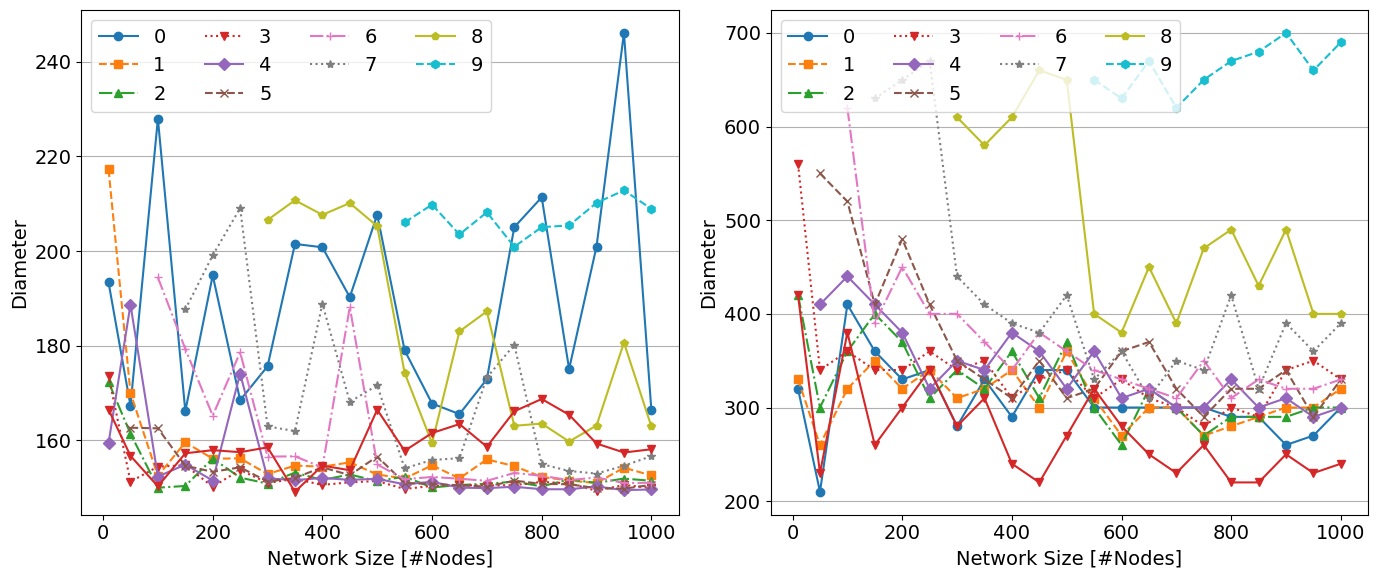

In [19]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
font = {
        'size'   : 14}
matplotlib.rc('font', **font)
N_list = [10]
seed = 1
for i in range(50, 1001, 50):
    N_list.append(i)
# labels = ['Chord', 'NN', 'RAPID', 'Perigee', 'Ours']
labels = ['Chord', 'Perigee', 'RAPID']
hatches = ["x", "/", ".", "\\",'']
tab10 = sns.color_palette("tab10", n_colors=10)
face_colors = tab10
x_tickslabel = N_list
width = 0.15
markers = ['x', '+', '*', 'o', 'P']
markers = ['o', 's', '^', 'v', 'D', 'x', '+', '*', 'p', 'h']
linestyles = ['-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--']
fig, axs = plt.subplots(ncols=2, figsize=(14, 6))
datas = [data_fabric_varying_random_ring, data_bitnode_varying_random_ring]
for j in range(2):
	ax = axs[j]
	data = datas[j]
	for i in range(10):
		# print(label, data[label])
		# print(len( data[f'K_ring_{i}_random']))
		k = 0
		while data[f'K_ring_{i}_random'][k] == 0:
			k += 1
		ax.plot(N_list[k:], data[f'K_ring_{i}_random'][k:], label=f'{i}', linestyle=linestyles[i], color=face_colors[i], marker=markers[i])
	ax.set_ylabel('Diameter')
	# ax.set_yticks([0, 250, 500, 750, 1000])
	# ax.set_yticklabels(['0', '2.5', '5', '7.5', '10'])
	# ax.set_yticklabels(['0', '250', '500', '750', '1000'], rotation=90)
	# ax.set_title('Diameter of different algorithms')
	# ax.set_xticks(x + 2.5*width)
	# ax.set_xticklabels(x_tickslabel)
	# ax.set_ylim([5.5, 30])
	ax.set_xlabel('Network Size [#Nodes]')
	# ax.legend(loc='upper left', bbox_to_anchor=(1.0, .95), frameon=False)
	ax.legend(ncols=4, loc="upper left")
	ax.grid(axis='y')
	# ax.set_ylim([0, 850])
	plt.tight_layout()
	# plt.show()
	# plt.savefig("diameter.png", bbox_inches='tight',)
	# plt.savefig("diameter.pdf", bbox_inches='tight')
axs[0].plot(N_list, data_fabric['Ours_greedy'], label='Ours',
		color=face_colors[3], marker=markers[3])
axs[1].plot(N_list, data_bitnode['Ours_greedy'], label='Ours',
		color=face_colors[3], marker=markers[3])
plt.savefig("./fig/benchmark_real_ablation.pdf", bbox_inches='tight')

In [17]:
data_distribute_fabric = {'chord_shortest_ring': [], 'chord_random_ring': [], 'nearest_neighbour_shortest_ring': [], 'nearest_neighbour_random_ring': [], 'K_ring_shortest_ring': [], 'K_ring_random_ring': [], 'K_ring_greedy': [], 'K_ring_epsilon_greedy': [], 'K_ring_random_distributed_stride_1': [185.05527513243825, 189.90546909884566, 198.73263935378714, 202.86741813005787, 187.6962955763506, 204.20756889346973, 202.7791141482938, 204.2214076986656, 199.51414666053233, 217.38130046673433, 206.8776787314577, 205.8740628409748, 207.05898141404958, 209.4945501147022, 205.77853711191594, 202.97971994498164, 203.35799865530728, 204.95678132852265, 209.30254054952826, 209.97682745590487, 208.80661662551375], 'K_ring_random_distributed_stride_2': [164.69341384301987, 177.2703626339518, 189.01176766106278, 196.3677656079381, 209.89348031269532, 203.69536938018322, 202.35572689162268, 201.14634574825197, 213.69212773501727, 205.13366348807023, 202.57891682533258, 208.69433239622472, 202.86096851238932, 206.13713861118754, 206.59823718316574, 212.9708886523016, 207.0588409907782, 208.17266290019, 206.1830845266834, 211.33100342824275, 204.70903490941404], 'K_ring_random_distributed_stride_4': [160.25113422242478, 178.36942678861126, 182.41061310979313, 179.50110157713516, 194.6848645250997, 201.05634549327763, 198.04895912047323, 193.54896445908182, 192.37385508753167, 191.92439755506877, 201.24807337938154, 196.35739285399086, 201.7012079871054, 195.64320768601561, 192.60644261909684, 195.48680540636818, 193.0290731530707, 196.97305206305964, 195.23139537531995, 196.39219268636793, 200.24525279648037], 'K_ring_random_distributed_stride_8': [170.02287884626645, 167.033980937213, 161.7976906808757, 184.25935944672023, 192.8214856932249, 186.09320275834142, 164.77480173340942, 185.20639279485158, 170.59177763052674, 190.90958059528367, 182.10054756888448, 185.0438730979969, 163.17348540978628, 188.0433142203579, 183.4191070569633, 178.543429922265, 187.0715200742033, 177.43945393939322, 178.5350100902042, 188.4534519427176, 189.93926556035046], 'K_ring_random_distributed_stride_16': [226.68279520696845, 164.06913203185806, 154.4501115389208, 156.12450863380542, 157.68787560664165, 163.75015777048012, 157.09386907623664, 183.25639738170258, 158.05131770357372, 165.6089981188993, 159.43381787706494, 161.01691183883742, 156.37913985585587, 176.9041730403021, 155.83927373972057, 156.24447106133002, 254.53944339606727, 159.791878034686, 163.0808158194805, 203.4565419974092, 176.80683327224415], 'K_ring_random_distributed_stride_32': [377.9954616067659, 192.11528568589864, 151.78975609543198, 171.02138605549632, 173.20357373580953, 157.92612973979934, 155.9673519089104, 157.9495823916397, 155.2220552682476, 157.9831512405135, 159.03435958564904, 220.32551288393532, 154.03285805131878, 156.19428796994993, 162.46424487233503, 156.7819531799436, 162.41799629850507, 157.5912953729392, 157.64865611089414, 156.46360711668183, 157.86080343374556], 'K_ring_random_distributed_stride_64': [342.13066935110703, 259.9680573799327, 212.42114228304246, 160.4582805161652, 157.00095880505594, 180.23567791198784, 164.0303539860562, 159.25835569871117, 162.8314740016575, 155.49476552651993, 167.39637822811645, 164.88440523814407, 166.55121714532112, 156.36745449365668, 158.26636931303372, 158.2143816151501, 155.9600939942838, 160.56273102544813, 159.06682835360618, 158.15569799968728, 158.84848097194597], 'K_ring_random_distributed_stride_128': [432.4360794898625, 255.0303071609161, 284.44782998163504, 202.22509402534558, 184.01722368877495, 175.76438055470578, 182.1555986513228, 186.09834576893763, 194.47892571485727, 158.66081980645092, 165.76746303787095, 180.68521458398985, 162.5967689695414, 154.8130866064004, 168.28029739370845, 158.14603433106475, 166.47250025220885, 179.83119362393379, 157.52024695021663, 154.8616940562764, 158.56680574779227], 'K_ring_random_distributed_stride_256': [240.35713882350038, 272.61139714370836, 349.21842309648486, 288.7228850357151, 251.53602874889594, 318.4302808193946, 169.3848125951942, 193.75684542905634, 234.5923111583453, 184.16718934443884, 161.4492250442645, 169.8357916216122, 188.7957898001272, 189.28424218719965, 188.11203282809907, 188.8489232972965, 161.26111802609896, 182.48737301259072, 158.197634089639, 164.46268905493383, 169.45205056005528], 'K_ring_random_distributed_stride_512': [385.2929659099864, 303.821285679669, 355.4229054877859, 277.2530171107086, 233.13781661457864, 490.90242463498856, 300.7959153067807, 333.19874454404066, 384.51048119096, 293.5942393886121, 370.22515783600323, 247.15632499707905, 199.88121086063467, 196.19807530497235, 220.51184839113526, 195.80406582859607, 167.85476610817872, 193.28930394041532, 167.968059482349, 240.00753993785813, 220.99478171778756]}
data_distribute_bitnode = {'chord_shortest_ring': [], 'chord_random_ring': [], 'nearest_neighbour_shortest_ring': [], 'nearest_neighbour_random_ring': [], 'K_ring_shortest_ring': [], 'K_ring_random_ring': [], 'K_ring_greedy': [], 'K_ring_epsilon_greedy': [], 'K_ring_random_distributed_stride_1': [510, 490, 550, 610, 550, 660, 620, 650, 690, 650, 700, 620, 620, 660, 630, 670, 680, 690, 670, 710, 670], 'K_ring_random_distributed_stride_2': [560, 510, 580, 610, 620, 630, 630, 610, 670, 610, 640, 590, 660, 670, 650, 640, 650, 670, 670, 650, 710], 'K_ring_random_distributed_stride_4': [550, 430, 620, 530, 650, 560, 560, 510, 510, 530, 550, 590, 600, 580, 650, 590, 650, 590, 580, 550, 650], 'K_ring_random_distributed_stride_8': [360, 340, 500, 440, 470, 500, 550, 500, 500, 470, 560, 450, 530, 460, 520, 460, 510, 490, 480, 480, 550], 'K_ring_random_distributed_stride_16': [460, 260, 390, 360, 420, 500, 520, 460, 430, 390, 440, 430, 470, 420, 530, 440, 500, 410, 500, 510, 480], 'K_ring_random_distributed_stride_32': [390, 310, 480, 460, 470, 490, 480, 440, 460, 480, 440, 460, 360, 390, 370, 410, 440, 460, 380, 410, 480], 'K_ring_random_distributed_stride_64': [390, 340, 400, 400, 500, 410, 400, 360, 380, 370, 340, 330, 320, 390, 370, 490, 320, 370, 430, 370, 360], 'K_ring_random_distributed_stride_128': [760, 390, 460, 400, 380, 400, 370, 340, 330, 340, 310, 340, 300, 300, 310, 340, 390, 310, 320, 370, 410], 'K_ring_random_distributed_stride_256': [390, 350, 760, 450, 370, 340, 440, 330, 330, 350, 310, 350, 310, 330, 310, 330, 340, 320, 300, 300, 300], 'K_ring_random_distributed_stride_512': [820, 400, 600, 400, 370, 430, 440, 450, 410, 360, 340, 350, 330, 300, 320, 330, 360, 310, 270, 310, 370]}

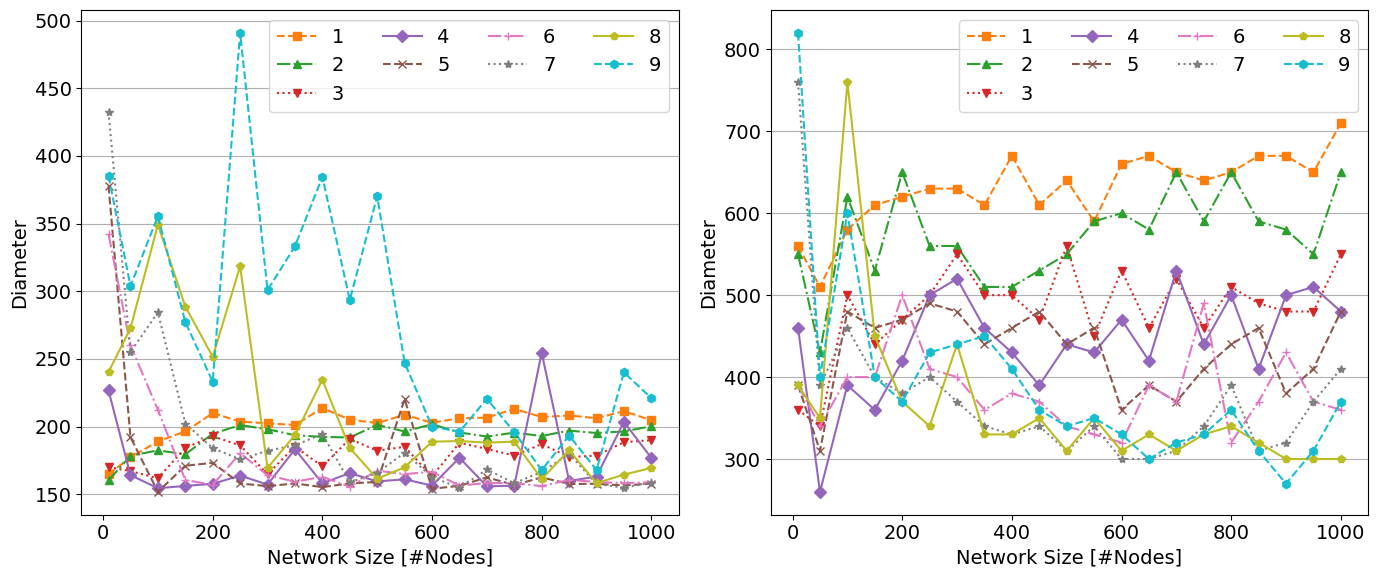

In [20]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
font = {
        'size'   : 14}
matplotlib.rc('font', **font)
N_list = [10]
seed = 1
for i in range(50, 1001, 50):
    N_list.append(i)
# labels = ['Chord', 'NN', 'RAPID', 'Perigee', 'Ours']
labels = ['Chord', 'Perigee', 'RAPID']
hatches = ["x", "/", ".", "\\",'']
tab10 = sns.color_palette("tab10", n_colors=10)
face_colors = tab10
x_tickslabel = N_list
width = 0.15
markers = ['x', '+', '*', 'o', 'P']
markers = ['o', 's', '^', 'v', 'D', 'x', '+', '*', 'p', 'h']
linestyles = ['-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--']
fig, axs = plt.subplots(ncols=2, figsize=(14, 6))
datas = [data_distribute_fabric, data_distribute_bitnode]
for j in range(2):
	ax = axs[j]
	data = datas[j]
	for i in range(1, 10):
		# print(label, data[label])
		# print(len( data[f'K_ring_{i}_random']))
		# print(len(N_list), len(data[f'K_ring_random_distributed_stride_{i}']))
		ax.plot(N_list, data[f'K_ring_random_distributed_stride_{2 ** i}'], label=f'{i}', linestyle=linestyles[i], color=face_colors[i], marker=markers[i])
	ax.set_ylabel('Diameter')
	# ax.set_yticks([0, 250, 500, 750, 1000])
	# ax.set_yticklabels(['0', '2.5', '5', '7.5', '10'])
	# ax.set_yticklabels(['0', '250', '500', '750', '1000'], rotation=90)
	# ax.set_title('Diameter of different algorithms')
	# ax.set_xticks(x + 2.5*width)
	# ax.set_xticklabels(x_tickslabel)
	# ax.set_ylim([5.5, 30])
	ax.set_xlabel('Network Size [#Nodes]')
	# ax.legend(loc='upper left', bbox_to_anchor=(1.0, .95), frameon=False)
	ax.legend(ncols=4)
	ax.grid(axis='y')
	# ax.set_ylim([0, 850])
	plt.tight_layout()
	# plt.show()
	# plt.savefig("diameter.png", bbox_inches='tight',)
	# plt.savefig("diameter.pdf", bbox_inches='tight')
plt.savefig("./fig/benchmark_real_distribute.pdf", bbox_inches='tight')
